[Descrizione](https://www.notion.so/enzoschitini/Raccolta-di-progetti-sviluppati-per-GitHub-0363c6c2924d4fdb8591f31e47b4011a?p=b0b8a41c28934d508cd8d4066d856989&pm=c) | [Compiti](https://www.notion.so/enzoschitini/540bfbb6b9724d6099f15849a9249fea?v=6ce952c45e874c09a7962fb24f9a9497)

# Análise Exploratória
Na minha opinião, a análise exploratória é uma das fases mais importantes de qualquer projeto que lide com dados. Aqui o objetivo é entender o contexto em que trabalharemos e como são os dados que temos que explorar, para termos toda uma documentação que precisaremos para criar os próximos algoritmos, mesmo os de Machine Learning. Acredito que mesmo nesta fase já podemos encontrar alguns Insights.

<img src="https://raw.githubusercontent.com/enzoschitini/Data-Science-Portfolio/main/01%20An%C3%A1lise%20explorat%C3%B3ria%20e%20limpeza%20de%20dados/E-commerce%20Customer%20Data%20For%20Behavior%20Analysis/Image/Copertina.png" alt="ebac-logo">

---

# **Scituffy** | Python: Brazilian E-Commerce Public Dataset by Olist
Fiz uma análise das vendas de um E-Commerce para entender melhor como são seus clientes. O conjunto de dados contém informações sobre 100.000 pedidos de 2016 a 2018 feitos em vários mercados no Brasil. Seus recursos permitem visualizar um pedido em múltiplas dimensões: desde status do pedido, preço, desempenho de pagamento e transporte, localização do cliente, atributos do produto e, finalmente, avaliações escritas pelos clientes

**Data Science** Portfóli | *05 Abril 2024*

[Enzo Schitini](https://www.linkedin.com/in/enzoschitini/) - Data Scientist • Expert Bubble.io • UX & UI @ Nugus creator

---

## O que você vai encontrar neste notebook? 👋

A ciência sempre me fascinou pelo fato de podermos descobrir coisas novas. E foi por essa vontade de fazer descobertas que me tornei Data Scientist, para resolver problemas reais e fazer as tais descobertas.

#### - *Contexto os dados*
Este conjunto de dados foi generosamente cedido pela Olist, o maior armazém do mercado brasileiro. Olist conecta pequenas empresas de todo o Brasil a canais de forma integrada e com um único contrato. Esses comerciantes podem vender seus produtos através da Olist Store e enviá-los diretamente aos clientes usando os parceiros logísticos da Olist. Para saber mais, visite nosso site: [www.olist.com](https://www.olist.com/)

Depois que um cliente compra o produto na Olist Store, o vendedor recebe uma notificação para atender o pedido. Assim que o cliente recebe o produto, ou vence a data estimada de entrega, o cliente recebe por e-mail uma pesquisa de satisfação onde pode dar uma nota sobre a experiência de compra e escrever alguns comentários.

Este é um conjunto de dados públicos de comércio eletrônico brasileiro de pedidos feitos na Olist Store. O conjunto de dados contém informações sobre 100.000 pedidos de 2016 a 2018 feitos em vários mercados no Brasil. Seus recursos permitem visualizar um pedido em múltiplas dimensões: desde status do pedido, preço, desempenho de pagamento e transporte, localização do cliente, atributos do produto e, finalmente, avaliações escritas pelos clientes. Também publicamos um conjunto de dados de geolocalização que correlaciona códigos postais brasileiros com coordenadas lat/lng.

#### - *Estrutura dos dados*

<img src="https://raw.githubusercontent.com/enzoschitini/Data-Science-Portfolio/main/01%20An%C3%A1lise%20explorat%C3%B3ria%20e%20limpeza%20de%20dados/E-commerce%20Customer%20Data%20For%20Behavior%20Analysis/Image/Schema.png" alt="ebac-logo">

> Os dados foram fornecidos pelo [Kaggle](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce)

## 🔥 Vamos começar!!!

### **`Tópicos`**

<ol type="1">
  <li>Preparação o ambiente de desenvolvimento</li>
  <li>Entender a estruturas de dados e colunas (Tratamento)</li>
  <li>Visualização</li>
  <li>Métricas</li>
  <li>Conclusão e hipótese</li>
</ol>

##### Abaixo você encontrará algumas insights e códigos sobre esses dados. Mas se quiser acessar um material somente com os insights, baixe o [PDF](https://drive.google.com/file/d/1fK1ocDTSzMpDhKy8jJ1yU3LN1Tm-gxcV/view?usp=drivesdk)

---

<a id='preparação-o-ambiente-de-desenvolvimento'></a>
## Preparação o ambiente de desenvolvimento

### Importando os pacotes

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import missingno as msno
import calendar

pd.set_option('display.max_columns', None)

### Carregando os Data sets

In [166]:
lista_datasets = ['olist_customers_dataset.csv', 'olist_geolocation_dataset.csv','olist_order_items_dataset.csv', 
         'olist_order_payments_dataset.csv', 'olist_order_reviews_dataset.csv', 'olist_orders_dataset.csv', 
         'olist_products_dataset.csv', 'olist_sellers_dataset.csv', 'product_category_name_translation.csv']

# Adicionando todos os conjuntos de dados em uma lista
dfs = [pd.read_csv(f'Data\{x}') for x in lista_datasets] 
print(f"Temos {len(lista_datasets)} data sets dentro da variável 'dfs'.")

<string>:6: SyntaxWarning:

invalid escape sequence '\{'

<>:6: SyntaxWarning:

invalid escape sequence '\{'

<string>:6: SyntaxWarning:

invalid escape sequence '\{'

<>:6: SyntaxWarning:

invalid escape sequence '\{'

C:\Users\schit\AppData\Local\Temp\ipykernel_10388\3660255893.py:6: SyntaxWarning:

invalid escape sequence '\{'



Temos 9 data sets dentro da variável 'dfs'.


Neste projeto temos 9 conjuntos de dados vinculados por `ID`. Por uma questão de organização, vamos colocá-los em uma lista, também para facilitar o acesso a esses dados em branco.

- `Informações sobre os data sets:`

| Nome da variável  | Descrição |
| ------- | --------- |
| dfs[0] | conjunto de dados dos clientes |
| dfs[1] | conjunto de dados de geolocalização |
| dfs[2] | conjunto de dados de itens de pedido |
| dfs[3] | conjunto de dados de pagamentos de pedidos |
| dfs[4] | conjunto de dados de análises de pedidos |
| dfs[5] | conjunto de dados de pedidos |
| dfs[6] | conjunto de dados de produtos |
| dfs[7] | conjunto de dados de vendedores |
| dfs[8] | tradução do nome da categoria do produto |

### Usamos map() para aplicar a função a cada DataFrame

In [167]:
_ = list(map(lambda x: display(x.head(n=5)), dfs))

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### Classe que vamos usar para ver as propriedades dos dados

In [168]:
class GuidaDataframe:
    def __init__(self, data_frame):
        self.data_frame = data_frame

    def esplorazione(self):
        righe, qnt_colonne = self.data_frame.shape
        quantita_righe = format(righe, ",").replace(',', '.')
        sequenza = list(range(qnt_colonne + 1))
        sequenza = sequenza[1:]

        colonne = self.data_frame.columns.to_list()
        types_list = [str(type(self.data_frame[col][0])).split("'")[1] for col in self.data_frame.columns]
        lista_categorias = [self.data_frame[col].nunique() for col in self.data_frame.columns]

        elementos_nulos = self.data_frame.isnull().sum()
        elementos_nulos = elementos_nulos.to_list()

        memoria = (self.data_frame.memory_usage(deep=True) / (1024 ** 2)).round() # Mb
        lista_memoria = memoria.to_list()
        lista_memoria = lista_memoria[1:]

        memoria = self.data_frame.memory_usage(deep=True) # Total Mb
        memoria_total = round(memoria.sum() / (1024 ** 2), 2)

        percentagem_dados_nulos = round((self.data_frame.isnull().sum() / righe) * 100)
        percentagem_dados_nulos = percentagem_dados_nulos.to_list()

        dados = pd.DataFrame({'Nome': colonne, 
                             'Tipo': types_list, 
                             'qnt_categorias': lista_categorias,
                             'Dados nulos' : elementos_nulos,
                             'Dados nulos %' : percentagem_dados_nulos,
                             'Memória (Mb)': lista_memoria}, index=sequenza)
        
        # Títulos
        print('Tabela Exploratória')
        print(f'Nesses dados temos {quantita_righe} linhas e {qnt_colonne} colunas.')
        print(f'Consumo de memória: {memoria_total}Mb.')
        
        return dados

## Entender a estruturas de dados e colunas (Tratamento)

Entender a estrutura dos dados significa saber quantas Linhas e Colunas existem, se há dados duplicados ou não, o Nome das colunas, seu Tipo, sua quantidade de categorias, quantos dados nulos e a porcentagem deles.

### Remover duplicados

In [169]:
for x in dfs:
    x.drop_duplicates(inplace=True)

### Estrutura das colunas
Agora vamos ver com mais detalhes como é a estrutura das colunas usando a função `esplorazione()` do pacote `main.py`

In [170]:
# uidaDataframe função no pacote main.py
ordem_data = 0
for data_set in lista_datasets:
    print(f'Informações sobre ----- {data_set} -----')
    print(f'dfs[{ordem_data}]\n')
    display(GuidaDataframe(dfs[ordem_data]).esplorazione())
    ordem_data += 1

"""
lista1 = [1, 2, 3, 4]
lista2 = ['a', 'b', 'c', 'd']

for elemento1, elemento2 in zip(lista1, lista2):
    print(elemento1, elemento2)

"""

Informações sobre ----- olist_customers_dataset.csv -----
dfs[0]

Tabela Exploratória
Nesses dados temos 99.441 linhas e 5 colunas.
Consumo de memória: 26.59Mb.


,Nome,Tipo,qnt_categorias,Dados nulos,Dados nulos %,Memória (Mb)
1,customer_id,str,99441,0,0.0,8.0
2,customer_unique_id,str,96096,0,0.0,8.0
3,customer_zip_code_prefix,numpy.int64,14994,0,0.0,1.0
4,customer_city,str,4119,0,0.0,6.0
5,customer_state,str,27,0,0.0,5.0


Informações sobre ----- olist_geolocation_dataset.csv -----
dfs[1]

Tabela Exploratória
Nesses dados temos 738.332 linhas e 5 colunas.
Consumo de memória: 118.16Mb.


,Nome,Tipo,qnt_categorias,Dados nulos,Dados nulos %,Memória (Mb)
1,geolocation_zip_code_prefix,numpy.int64,19015,0,0.0,6.0
2,geolocation_lat,numpy.float64,717360,0,0.0,6.0
3,geolocation_lng,numpy.float64,717613,0,0.0,6.0
4,geolocation_city,str,8011,0,0.0,44.0
5,geolocation_state,str,27,0,0.0,36.0


Informações sobre ----- olist_order_items_dataset.csv -----
dfs[2]

Tabela Exploratória
Nesses dados temos 112.650 linhas e 7 colunas.
Consumo de memória: 35.99Mb.


,Nome,Tipo,qnt_categorias,Dados nulos,Dados nulos %,Memória (Mb)
1,order_id,str,98666,0,0.0,9.0
2,order_item_id,numpy.int64,21,0,0.0,1.0
3,product_id,str,32951,0,0.0,9.0
4,seller_id,str,3095,0,0.0,9.0
5,shipping_limit_date,str,93318,0,0.0,7.0
6,price,numpy.float64,5968,0,0.0,1.0
7,freight_value,numpy.float64,6999,0,0.0,1.0


Informações sobre ----- olist_order_payments_dataset.csv -----
dfs[3]

Tabela Exploratória
Nesses dados temos 103.886 linhas e 5 colunas.
Consumo de memória: 16.23Mb.


,Nome,Tipo,qnt_categorias,Dados nulos,Dados nulos %,Memória (Mb)
1,order_id,str,99440,0,0.0,8.0
2,payment_sequential,numpy.int64,29,0,0.0,1.0
3,payment_type,str,5,0,0.0,6.0
4,payment_installments,numpy.int64,24,0,0.0,1.0
5,payment_value,numpy.float64,29077,0,0.0,1.0


Informações sobre ----- olist_order_reviews_dataset.csv -----
dfs[4]

Tabela Exploratória
Nesses dados temos 99.224 linhas e 7 colunas.
Consumo de memória: 39.12Mb.


,Nome,Tipo,qnt_categorias,Dados nulos,Dados nulos %,Memória (Mb)
1,review_id,str,98410,0,0.0,8.0
2,order_id,str,98673,0,0.0,8.0
3,review_score,numpy.int64,5,0,0.0,1.0
4,review_comment_title,float,4527,87656,88.0,3.0
5,review_comment_message,float,36159,58247,59.0,7.0
6,review_creation_date,str,636,0,0.0,6.0
7,review_answer_timestamp,str,98248,0,0.0,6.0


Informações sobre ----- olist_orders_dataset.csv -----
dfs[5]

Tabela Exploratória
Nesses dados temos 99.441 linhas e 8 colunas.
Consumo de memória: 52.94Mb.


,Nome,Tipo,qnt_categorias,Dados nulos,Dados nulos %,Memória (Mb)
1,order_id,str,99441,0,0.0,8.0
2,customer_id,str,99441,0,0.0,8.0
3,order_status,str,8,0,0.0,5.0
4,order_purchase_timestamp,str,98875,0,0.0,6.0
5,order_approved_at,str,90733,160,0.0,6.0
6,order_delivered_carrier_date,str,81018,1783,2.0,6.0
7,order_delivered_customer_date,str,95664,2965,3.0,6.0
8,order_estimated_delivery_date,str,459,0,0.0,6.0


Informações sobre ----- olist_products_dataset.csv -----
dfs[6]

Tabela Exploratória
Nesses dados temos 32.951 linhas e 9 colunas.
Consumo de memória: 6.3Mb.


,Nome,Tipo,qnt_categorias,Dados nulos,Dados nulos %,Memória (Mb)
1,product_id,str,32951,0,0.0,3.0
2,product_category_name,str,73,610,2.0,2.0
3,product_name_lenght,numpy.float64,66,610,2.0,0.0
4,product_description_lenght,numpy.float64,2960,610,2.0,0.0
5,product_photos_qty,numpy.float64,19,610,2.0,0.0
6,product_weight_g,numpy.float64,2204,2,0.0,0.0
7,product_length_cm,numpy.float64,99,2,0.0,0.0
8,product_height_cm,numpy.float64,102,2,0.0,0.0
9,product_width_cm,numpy.float64,95,2,0.0,0.0


Informações sobre ----- olist_sellers_dataset.csv -----
dfs[7]

Tabela Exploratória
Nesses dados temos 3.095 linhas e 4 colunas.
Consumo de memória: 0.59Mb.


,Nome,Tipo,qnt_categorias,Dados nulos,Dados nulos %,Memória (Mb)
1,seller_id,str,3095,0,0.0,0.0
2,seller_zip_code_prefix,numpy.int64,2246,0,0.0,0.0
3,seller_city,str,611,0,0.0,0.0
4,seller_state,str,23,0,0.0,0.0


Informações sobre ----- product_category_name_translation.csv -----
dfs[8]

Tabela Exploratória
Nesses dados temos 71 linhas e 2 colunas.
Consumo de memória: 0.01Mb.


,Nome,Tipo,qnt_categorias,Dados nulos,Dados nulos %,Memória (Mb)
1,product_category_name,str,71,0,0.0,0.0
2,product_category_name_english,str,71,0,0.0,0.0


"\nlista1 = [1, 2, 3, 4]\nlista2 = ['a', 'b', 'c', 'd']\n\nfor elemento1, elemento2 in zip(lista1, lista2):\n    print(elemento1, elemento2)\n\n"

In [171]:
def get_columns(dataframe:pd.DataFrame, posicao:int):
    lista_colunas = dataframe.columns.tolist()
    print(f">>>   {lista_datasets[posicao]}   <<<   dfs[{posicao}] - Colunas:")
    
    for coluna in lista_colunas:
        print(f"| ---- {coluna}")
    print('\n')

for x in range(len(lista_datasets)):
    get_columns(dfs[x], x)

>>>   olist_customers_dataset.csv   <<<   dfs[0] - Colunas:
| ---- customer_id
| ---- customer_unique_id
| ---- customer_zip_code_prefix
| ---- customer_city
| ---- customer_state


>>>   olist_geolocation_dataset.csv   <<<   dfs[1] - Colunas:
| ---- geolocation_zip_code_prefix
| ---- geolocation_lat
| ---- geolocation_lng
| ---- geolocation_city
| ---- geolocation_state


>>>   olist_order_items_dataset.csv   <<<   dfs[2] - Colunas:
| ---- order_id
| ---- order_item_id
| ---- product_id
| ---- seller_id
| ---- shipping_limit_date
| ---- price
| ---- freight_value


>>>   olist_order_payments_dataset.csv   <<<   dfs[3] - Colunas:
| ---- order_id
| ---- payment_sequential
| ---- payment_type
| ---- payment_installments
| ---- payment_value


>>>   olist_order_reviews_dataset.csv   <<<   dfs[4] - Colunas:
| ---- review_id
| ---- order_id
| ---- review_score
| ---- review_comment_title
| ---- review_comment_message
| ---- review_creation_date
| ---- review_answer_timestamp


>>>   olist_o

### Reparando as colunas de data

- olist_order_items_dataset.csv (dfs[2]): `shipping_limit_date`

In [172]:
dfs[2]['shipping_limit_date'] = pd.to_datetime(dfs[2]['shipping_limit_date'])

In [173]:
dfs[2].dtypes == 'datetime64[ns]'

order_id               False
order_item_id          False
product_id             False
seller_id              False
shipping_limit_date     True
price                  False
freight_value          False
dtype: bool

- olist_order_reviews_dataset.csv (dfs[4]): `review_creation_date`, `review_answer_timestamp`

In [174]:
dfs[4]['review_creation_date'] = pd.to_datetime(dfs[4]['review_creation_date'])
dfs[4]['review_answer_timestamp'] = pd.to_datetime(dfs[4]['review_answer_timestamp'])

In [175]:
dfs[4].dtypes == 'datetime64[ns]'

review_id                  False
order_id                   False
review_score               False
review_comment_title       False
review_comment_message     False
review_creation_date        True
review_answer_timestamp     True
dtype: bool

- olist_orders_dataset.csv (dfs[5]): `order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`

In [176]:
dfs[5]['order_purchase_timestamp'] = pd.to_datetime(dfs[5]['order_purchase_timestamp'])
dfs[5]['order_approved_at'] = pd.to_datetime(dfs[5]['order_approved_at'])
dfs[5]['order_delivered_carrier_date'] = pd.to_datetime(dfs[5]['order_delivered_carrier_date'])
dfs[5]['order_delivered_customer_date'] = pd.to_datetime(dfs[5]['order_delivered_customer_date'])

In [177]:
dfs[5].dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date            object
dtype: object

### Reparando as colunas de texto
Para cada coluna de nossos conjuntos de dados, transformaremos agora aquelas que são do tipo `str` para `category`. Desta forma podemos economizar espaço de memória e ter melhor desempenho na execução do algoritmo

- Tomemos como exemplo o conjunto de dados dos clientes (dfs[0]).
Existem colunas `str` `object`

In [178]:
dfs[0].dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

Vamos transformar isso agora em category!!! A função que você vê abaixo faz isso em todos os Data sets

In [179]:
def str_to_category(dataframe:pd.DataFrame):
    dataframe = pd.DataFrame(dataframe)
    lista_colunas_str = dataframe.select_dtypes('object').columns.to_list()

    for coluna in lista_colunas_str:
        dataframe[coluna] = dataframe[coluna].astype('category')
    return dataframe

dfs = [str_to_category(x) for x in dfs]

In [180]:
dfs[2].dtypes

order_id                     category
order_item_id                   int64
product_id                   category
seller_id                    category
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

### Dados faltantes
Entre os conjuntos de dados que possuem dados nulos estão: `olist_order_reviews_dataset.csv -> (dfs[4])`; `olist_orders_dataset.csv -> (dfs[5])`;
`olist_products_dataset.csv -> (dfs[6])`. Agora vamos analisá-los para entender melhor como são e pensar em como removê-los.

Então, vou pegar aquelas linhas que têm dados vazios, fazer uma pequena análise com o comando describe() e depois excluir essas linhas

In [181]:
lista_dfs_nulos = dfs[4:7] # Data Frames com dados nulos

Tabela Exploratória
Nesses dados temos 99.224 linhas e 7 colunas.
Consumo de memória: 28.98Mb.


,Nome,Dados nulos,Dados nulos %
1,review_id,0,0.0
2,order_id,0,0.0
3,review_score,0,0.0
4,review_comment_title,87656,88.0
5,review_comment_message,58247,59.0
6,review_creation_date,0,0.0
7,review_answer_timestamp,0,0.0


Tabela Exploratória
Nesses dados temos 99.441 linhas e 8 colunas.
Consumo de memória: 23.52Mb.


,Nome,Dados nulos,Dados nulos %
1,order_id,0,0.0
2,customer_id,0,0.0
3,order_status,0,0.0
4,order_purchase_timestamp,0,0.0
5,order_approved_at,160,0.0
6,order_delivered_carrier_date,1783,2.0
7,order_delivered_customer_date,2965,3.0
8,order_estimated_delivery_date,0,0.0


Tabela Exploratória
Nesses dados temos 32.951 linhas e 9 colunas.
Consumo de memória: 5.48Mb.


,Nome,Dados nulos,Dados nulos %
1,product_id,0,0.0
2,product_category_name,610,2.0
3,product_name_lenght,610,2.0
4,product_description_lenght,610,2.0
5,product_photos_qty,610,2.0
6,product_weight_g,2,0.0
7,product_length_cm,2,0.0
8,product_height_cm,2,0.0
9,product_width_cm,2,0.0


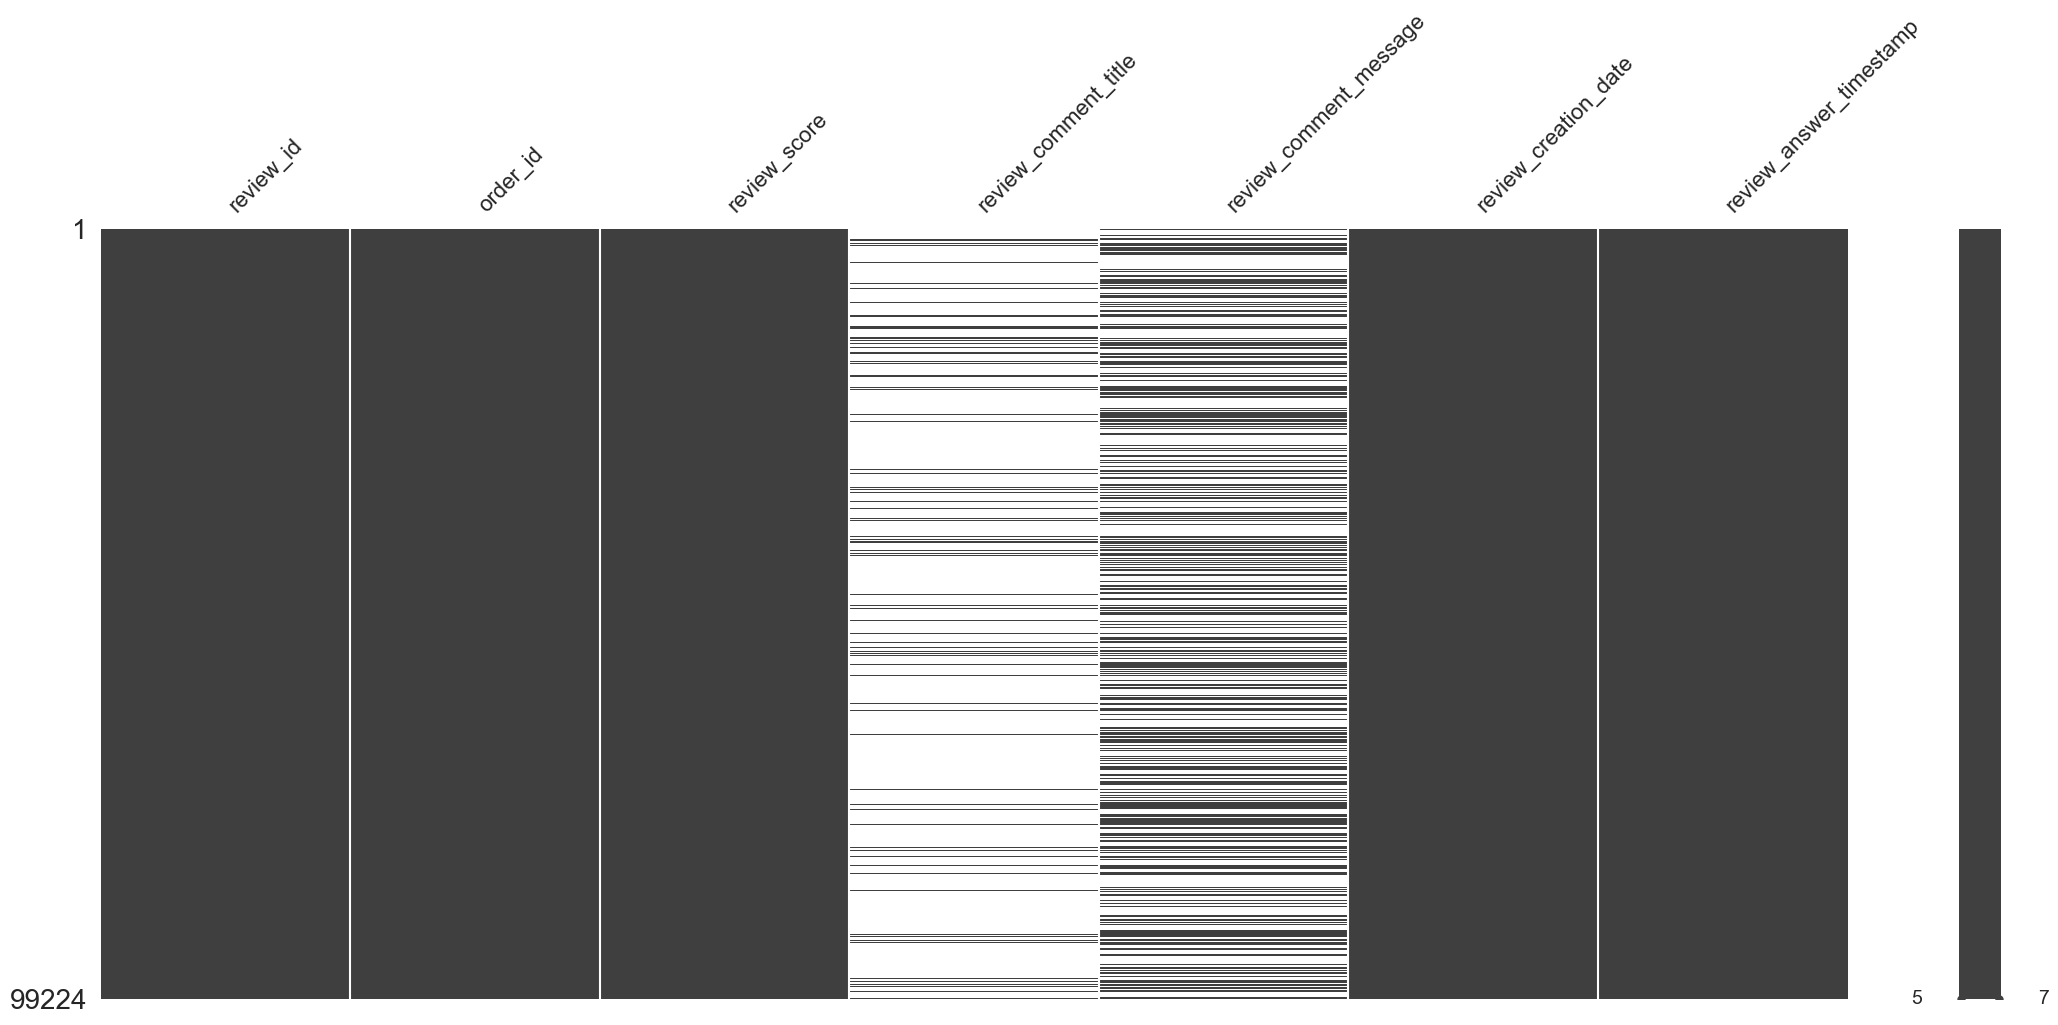

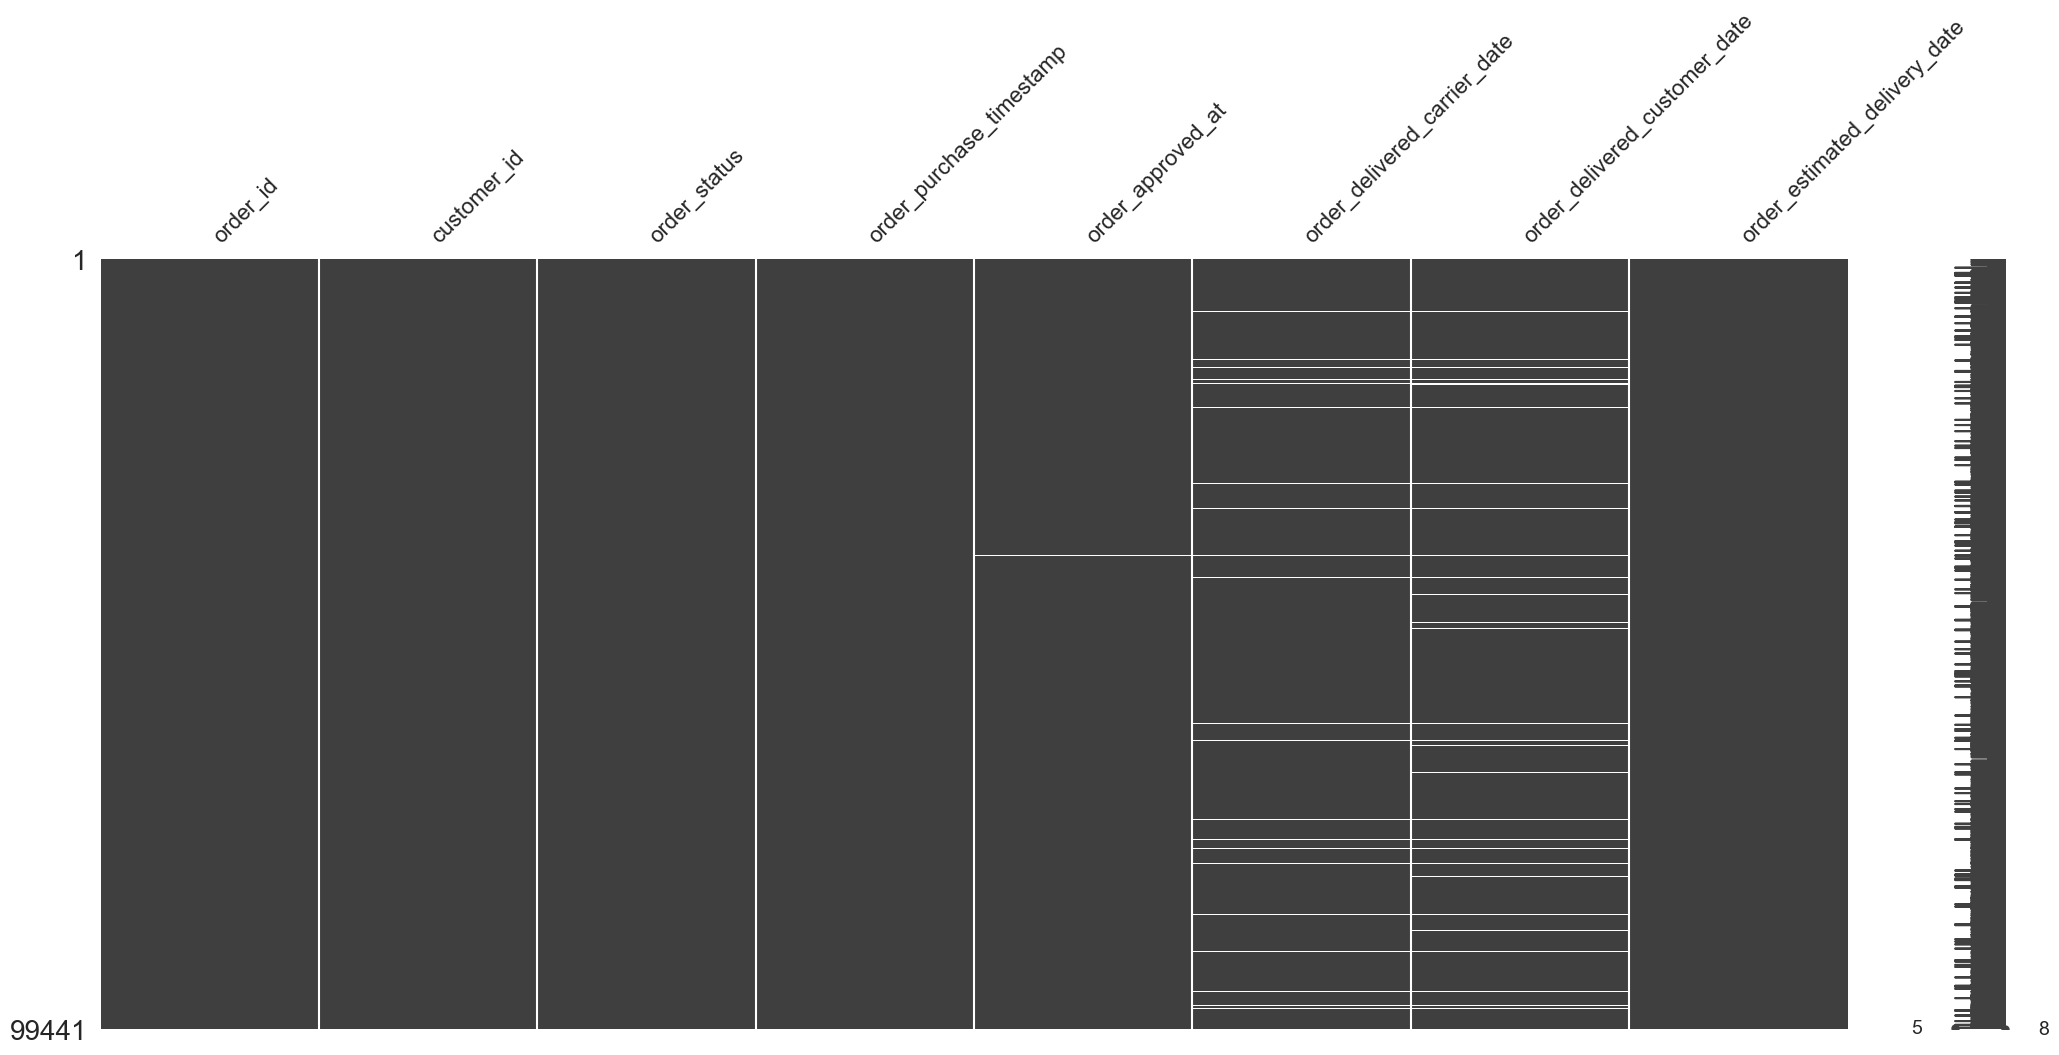

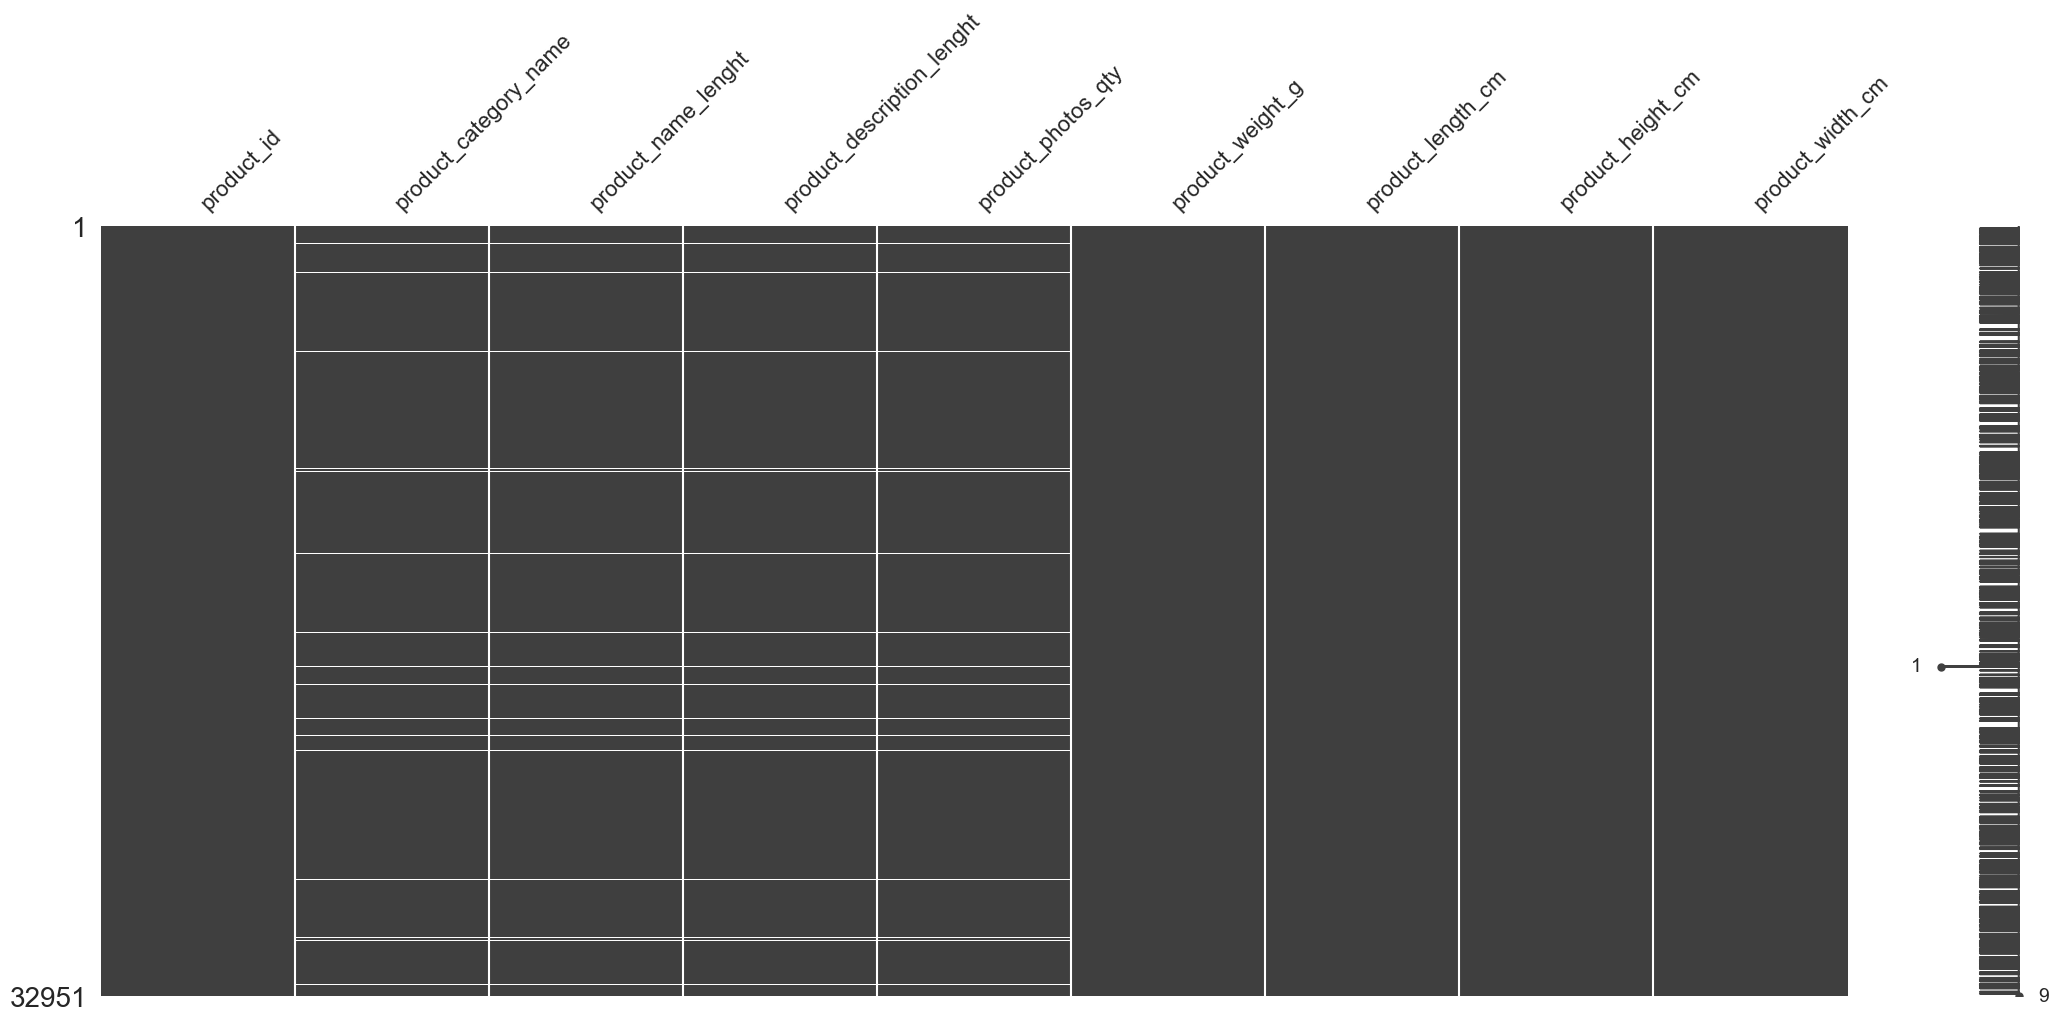

In [182]:
for x in lista_dfs_nulos:
    display(GuidaDataframe(x).esplorazione()[['Nome', 'Dados nulos', 'Dados nulos %']])
    msno.matrix(x)

#### *Agora vamos analisar os dados nulos de cada Data Frame da lista*

- **`olist_order_reviews_dataset.csv -> (dfs[4])`** ->  existem duas colunas que possuem muitos dados nulos. Portanto não é mais possível reparar essas colunas, basta removê-las.

In [183]:
#dfs[4].drop(columns=['review_comment_title', 'review_comment_message'], inplace=True)

In [184]:
dfs[4].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  category      
 1   order_id                 99224 non-null  category      
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  category      
 4   review_comment_message   40977 non-null  category      
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: category(4), datetime64[ns](2), int64(1)
memory usage: 10.6 MB


- **`olist_orders_dataset.csv -> (dfs[5])`** & **`olist_products_dataset.csv -> (dfs[6])`** -> Essas colunas, no entanto, não possuem tantos dados nulos e eles estão espalhadas entre os outros registros. Portanto pode ser uma perda de tempo recuperar esses dados nulos, até porque são poucos. Portanto, não precisamos deletar a coluna inteira, apenas as nulas são suficientes.

In [185]:
dfs[5].dropna(inplace=True)
dfs[6].dropna(inplace=True)

In [186]:
GuidaDataframe(dfs[5]).esplorazione()[['Nome', 'Dados nulos', 'Dados nulos %']]

Tabela Exploratória
Nesses dados temos 96.461 linhas e 8 colunas.
Consumo de memória: 26.15Mb.


,Nome,Dados nulos,Dados nulos %
1,order_id,0,0.0
2,customer_id,0,0.0
3,order_status,0,0.0
4,order_purchase_timestamp,0,0.0
5,order_approved_at,0,0.0
6,order_delivered_carrier_date,0,0.0
7,order_delivered_customer_date,0,0.0
8,order_estimated_delivery_date,0,0.0


In [187]:
GuidaDataframe(dfs[6]).esplorazione()[['Nome', 'Dados nulos', 'Dados nulos %']]

Tabela Exploratória
Nesses dados temos 32.340 linhas e 9 colunas.
Consumo de memória: 6.7Mb.


,Nome,Dados nulos,Dados nulos %
1,product_id,0,0.0
2,product_category_name,0,0.0
3,product_name_lenght,0,0.0
4,product_description_lenght,0,0.0
5,product_photos_qty,0,0.0
6,product_weight_g,0,0.0
7,product_length_cm,0,0.0
8,product_height_cm,0,0.0
9,product_width_cm,0,0.0


## Visualização

### Data set de todos os pedidos

Para obter gráficos e aplicar alguns métodos de análise é melhor combinar todos os dados da lista `dfs` e criar um único `df`

In [188]:
df_merged = pd.merge(dfs[2], dfs[3], on='order_id')
df_merged = pd.merge(df_merged, dfs[5], on='order_id')
df_merged = pd.merge(df_merged, dfs[6], on='product_id')
df_merged = pd.merge(df_merged, dfs[7], on='seller_id')
df_merged = pd.merge(df_merged, dfs[0], on='customer_id')
df_merged = pd.merge(df_merged, dfs[4], on='order_id')
df = df_merged

In [189]:
dfs[1].head()#.to_clipboard()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [190]:
df[['order_id', 'customer_zip_code_prefix', 'seller_zip_code_prefix']].head()#.to_clipboard()

,order_id,customer_zip_code_prefix,seller_zip_code_prefix
0,00010242fe8c5a6d1ba2dd792cb16214,28013,27277
1,130898c0987d1801452a8ed92a670612,75800,27277
2,532ed5e14e24ae1f0d735b91524b98b9,30720,27277
3,6f8c31653edb8c83e1a739408b5ff750,83070,27277
4,7d19f4ef4d04461989632411b7e588b9,36400,27277


### Engenharia de atributos

- Duração da aprovação do pagamento

In [191]:
df['purchase_approval_time'] = df['order_approved_at'] - df['order_purchase_timestamp']

- Differenza tra la data di arrivo e la data che si aspettava

In [192]:
df['difference_sought_and_expected'] = df['order_purchase_timestamp'] - df['order_delivered_customer_date']

In [193]:
estados_brasil = {
    'AC': 'Norte',
    'AL': 'Nordeste',
    'AP': 'Norte',
    'AM': 'Norte',
    'BA': 'Nordeste',
    'CE': 'Nordeste',
    'DF': 'Centro-Oeste',
    'ES': 'Sudeste',
    'GO': 'Centro-Oeste',
    'MA': 'Nordeste',
    'MT': 'Centro-Oeste',
    'MS': 'Centro-Oeste',
    'MG': 'Sudeste',
    'PA': 'Norte',
    'PB': 'Nordeste',
    'PR': 'Sul',
    'PE': 'Nordeste',
    'PI': 'Nordeste',
    'RJ': 'Sudeste',
    'RN': 'Nordeste',
    'RS': 'Sul',
    'RO': 'Norte',
    'RR': 'Norte',
    'SC': 'Sul',
    'SP': 'Sudeste',
    'SE': 'Nordeste',
    'TO': 'Norte'
}

# Exemplo de uso:
print(estados_brasil['SP'])  # Saída: Sudeste

Sudeste


In [194]:
df['customer_zone'] = df['customer_state'].map(estados_brasil)
df['seller_zone'] = df['seller_state'].map(estados_brasil)

df['customer_zone'] = df['customer_zone'].astype('category')
df['seller_zone'] = df['seller_zone'].astype('category')

Agora que temos todos os nossos dados em um `df` podemos criar novas colunas baseadas em outras

- Peso do produto (g)

In [195]:
df['Kg'] = df['product_weight_g'] / 1000

- Data da compra

In [196]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'].astype(str), format='%Y-%m-%d %H:%M:%S')
df['day_of_purchase'] = df['order_purchase_timestamp'].dt.day_name()
df['month_of_purchase'] = df['order_purchase_timestamp'].dt.month_name()
df['year_of_purchase'] = df['order_purchase_timestamp'].dt.year
df['month/year_of_purchase'] = df['month_of_purchase'].astype(str) + '-' + df['year_of_purchase'].astype(str)
df['shipping_duration'] = df['order_delivered_customer_date'] - df['order_purchase_timestamp']

In [197]:
df.shipping_duration.mean()

Timedelta('12 days 10:34:56.086242227')

In [198]:
def calcola_durata(input_string):
    # Dividi la stringa per ottenere giorni, ore, minuti e secondi
    giorni, resto = input_string.split(" days ")
    ore, minuti, secondi = map(int, resto.split(":"))

    # Converti giorni in ore e somma il tutto
    totale_ore = int(giorni) * 24 + ore

    return totale_ore, minuti, secondi

# Esempio di utilizzo della funzione
durata_stringa = "7 days 14:44:46"
ore, minuti, secondi = calcola_durata(durata_stringa)
print("La durata è di {} ore, {} minuti e {} secondi.".format(ore, minuti, secondi))

La durata è di 182 ore, 44 minuti e 46 secondi.


- Id único para cada pedido

In [199]:
df['order_unique_id'] = df['order_id'].astype(str) + '-' + df['order_item_id'].astype(str)
df['order_unique_id'] = df['order_unique_id'].astype('category')

- Preço das parcelas

In [200]:
df['installments_price'] = df['payment_value'].round() / df['payment_installments'].round()

### Organizando as colunas

In [201]:
# Definição das colunas divididas em grupos lógicos
columns_dict = {
    'Informações do Pedido': [
        'order_id', 'order_item_id', 'order_unique_id', 'order_status',
        'order_purchase_timestamp', 'order_approved_at',
        'order_delivered_carrier_date', 'order_delivered_customer_date',
        'order_estimated_delivery_date', 'shipping_limit_date',
        'shipping_duration'
    ],
    'Informações do Cliente': [
        'customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
        'customer_city', 'customer_state', 'customer_zone'
    ],
    'Informações do Produto': [
        'product_id', 'product_category_name', 'product_name_lenght', 
        'product_description_lenght', 'product_photos_qty', 'product_weight_g', 
        'product_length_cm', 'product_height_cm', 'product_width_cm', 'Kg'
    ],
    'Informações do Vendedor': [
        'seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state', 'seller_zone'
    ],
    'Informações de Pagamento': [
        'payment_sequential', 'payment_type', 'payment_installments', 
        'installments_price', 'price', 'freight_value', 'payment_value'
    ],
    'Avaliações': [
        'review_id', 'review_score', 'review_comment_title', 
        'review_comment_message', 'review_creation_date', 
        'review_answer_timestamp'
    ],
    'Informações Temporais': [
        'day_of_purchase', 'month_of_purchase', 'year_of_purchase', 
        'month/year_of_purchase',
        'purchase_approval_time', 'difference_sought_and_expected'
    ]
}

# Criamos uma lista ordenada das colunas
ordered_columns = []
for group, columns in columns_dict.items():
    ordered_columns.extend(columns)

# Reorganizamos as colunas do DataFrame
df = df[ordered_columns]

# Data frame com as avaliações (sem dados NAN):
data_reviews = df.dropna()

# Visualizamos as primeiras linhas do DataFrame reorganizado
df.head()

,order_id,order_item_id,order_unique_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,shipping_duration,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_zone,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,Kg,seller_id,seller_zip_code_prefix,seller_city,seller_state,seller_zone,payment_sequential,payment_type,payment_installments,installments_price,price,freight_value,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,day_of_purchase,month_of_purchase,year_of_purchase,month/year_of_purchase,purchase_approval_time,difference_sought_and_expected
0,00010242fe8c5a6d1ba2dd792cb16214,1,00010242fe8c5a6d1ba2dd792cb16214-1,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,2017-09-19 09:45:35,7 days 14:44:46,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,Sudeste,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,0.65,48436dade18ac8b2bce089ec2a041202,27277,volta redonda,SP,Sudeste,1,credit_card,2,36.0,58.9,13.29,72.19,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21,2017-09-22 10:57:03,Wednesday,September,2017,September-2017,0 days 00:46:33,-8 days +09:15:14
1,130898c0987d1801452a8ed92a670612,1,130898c0987d1801452a8ed92a670612-1,delivered,2017-06-28 11:52:20,2017-06-29 02:44:11,2017-07-05 12:00:33,2017-07-13 20:39:29,2017-07-26 00:00:00,2017-07-05 02:44:11,15 days 08:47:09,e6eecc5a77de221464d1c4eaff0a9b64,0fb8e3eab2d3e79d92bb3fffbb97f188,75800,jatai,GO,Centro-Oeste,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,0.65,48436dade18ac8b2bce089ec2a041202,27277,volta redonda,SP,Sudeste,1,boleto,1,74.0,55.9,17.96,73.86,b11cba360bbe71410c291b764753d37f,5,NaN,"lannister como sempre, entregou certinho e den...",2017-07-14,2017-07-17 12:50:07,Wednesday,June,2017,June-2017,0 days 14:51:51,-16 days +15:12:51
2,532ed5e14e24ae1f0d735b91524b98b9,1,532ed5e14e24ae1f0d735b91524b98b9-1,delivered,2018-05-18 10:25:53,2018-05-18 12:31:43,2018-05-23 14:05:00,2018-06-04 18:34:26,2018-06-07 00:00:00,2018-05-23 10:56:25,17 days 08:08:33,4ef55bf80f711b372afebcb7c715344a,3419052c8c6b45daf79c1e426f9e9bcb,30720,belo horizonte,MG,Sudeste,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,0.65,48436dade18ac8b2bce089ec2a041202,27277,volta redonda,SP,Sudeste,1,credit_card,2,41.5,64.9,18.33,83.23,af01c4017c5ab46df6cc810e069e654a,4,super recomendo,carrinho muito bonito,2018-06-05,2018-06-06 21:41:12,Friday,May,2018,May-2018,0 days 02:05:50,-18 days +15:51:27
3,6f8c31653edb8c83e1a739408b5ff750,1,6f8c31653edb8c83e1a739408b5ff750-1,delivered,2017-08-01 18:38:42,2017-08-01 18:55:08,2017-08-02 19:07:36,2017-08-09 21:26:33,2017-08-25 00:00:00,2017-08-07 18:55:08,8 days 02:47:51,30407a72ad8b3f4df4d15369126b20c9,e7c828d22c0682c1565252deefbe334d,83070,sao jose dos pinhais,PR,Sul,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,0.65,48436dade18ac8b2bce089ec2a041202,27277,volta redonda,SP,Sudeste,1,credit_card,3,25.0,58.9,16.17,75.07,8304ff37d8b16b57086fa283fe0c44f8,5,NaN,NaN,2017-08-10,2017-08-13 03:35:17,Tuesday,August,2017,August-2017,0 days 00:16:26,-9 days +21:12:09
4,7d19f4ef4d04461989632411b7e588b9,1,7d19f4ef4d04461989632411b7e588b9-1,delivered,2017-08-10 21:48:40,2017-08-10 22:05:11,2017-08-11 19:43:07,2017-08-24 20:04:21,2017-09-01 00:00:00,2017-08-16 22:05:11,13 days 22:15:41,91a792fef70ecd8cc69d3c7feb3d12da,0bb98ba72dcc08e95f9d8cc434e9a2cc,36400,conselheiro lafaiete,MG,Sudeste,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0

In [202]:
GuidaDataframe(df).esplorazione()

Tabela Exploratória
Nesses dados temos 113.216 linhas e 51 colunas.
Consumo de memória: 107.99Mb.


,Nome,Tipo,qnt_categorias,Dados nulos,Dados nulos %,Memória (Mb)
1,order_id,str,94490,0,0.0,9.0
2,order_item_id,numpy.int64,21,0,0.0,1.0
3,order_unique_id,str,107825,0,0.0,13.0
4,order_status,str,2,0,0.0,0.0
5,order_purchase_timestamp,pandas._libs.tslibs.timestamps.Timestamp,93993,0,0.0,1.0
6,order_approved_at,pandas._libs.tslibs.timestamps.Timestamp,86583,0,0.0,1.0
7,order_delivered_carrier_date,pandas._libs.tslibs.timestamps.Timestamp,78424,0,0.0,1.0
8,order_delivered_customer_date,pandas._libs.tslibs.timestamps.Timestamp,93706,0,0.0,1.0
9,order_estimated_delivery_date,str,444,0,0.0,0.0
10,shipping_limit_date,pandas._libs.tslibs.timestamps.Timestamp,89549,0,0.0,1.0


### Distribuição de algumas colunas categóricas

In [204]:
def grafico_categoria(coluna: str, dataframe):
    # Contar a frequência de cada categoria na coluna
    coluna_dic = dataframe[coluna].value_counts().to_dict()
    
    # Criar o gráfico de barras
    fig = px.bar(
        x=list(coluna_dic.values()), 
        y=list(coluna_dic.keys()), 
        orientation='h',  # Coloca o gráfico na horizontal
        title=f"Distribuição da coluna: '{coluna}'",
        labels={'x': 'Frequência', 'y': coluna},  # Renomeia os eixos
        color=list(coluna_dic.keys()),  # Colore as barras por categoria
        color_discrete_sequence=px.colors.qualitative.Set2  # Melhora a paleta de cores
    )
    
    # Ajuste da formatação do layout
    fig.update_layout(
        xaxis_title='Frequência',
        yaxis_title=coluna,
        title_x=0.5,  # Centraliza o título
        template='plotly_white',  # Aplica um layout mais limpo
        yaxis=dict(categoryorder='total ascending')  # Ordena as categorias pelo valor
    )
    
    # Exibir o gráfico
    fig.show()

In [205]:
grafico_categoria('product_category_name', df)
grafico_categoria('payment_type', df)
grafico_categoria('customer_state', df)
grafico_categoria('seller_state', df)
grafico_categoria('day_of_purchase', df)
grafico_categoria('month_of_purchase', df)
grafico_categoria('order_status', df)
grafico_categoria('customer_zone', df)
grafico_categoria('seller_zone', df)

### Outliers & Boxplots

In [206]:
def boxplot(column_name: str):
    plt.close('all')
    plt.rc('figure', figsize=(22, 8))  # Aumentando a altura para melhor visualização
    
    # Configurando o estilo do Seaborn
    sns.set(style='whitegrid')

    # Criando o boxplot
    ax = sns.boxplot(x=column_name, data=df, palette='Set2')  # Usando uma paleta de cores

    # Adicionando título e rótulos
    ax.set_title(f'Boxplot of {column_name}', fontsize=20)
    ax.set_xlabel(column_name, fontsize=16)
    ax.set_ylabel('Values', fontsize=16)
    
    # Adicionando grade
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Mostrando o gráfico
    plt.show()

C:\Users\schit\AppData\Local\Temp\ipykernel_10388\3713902240.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




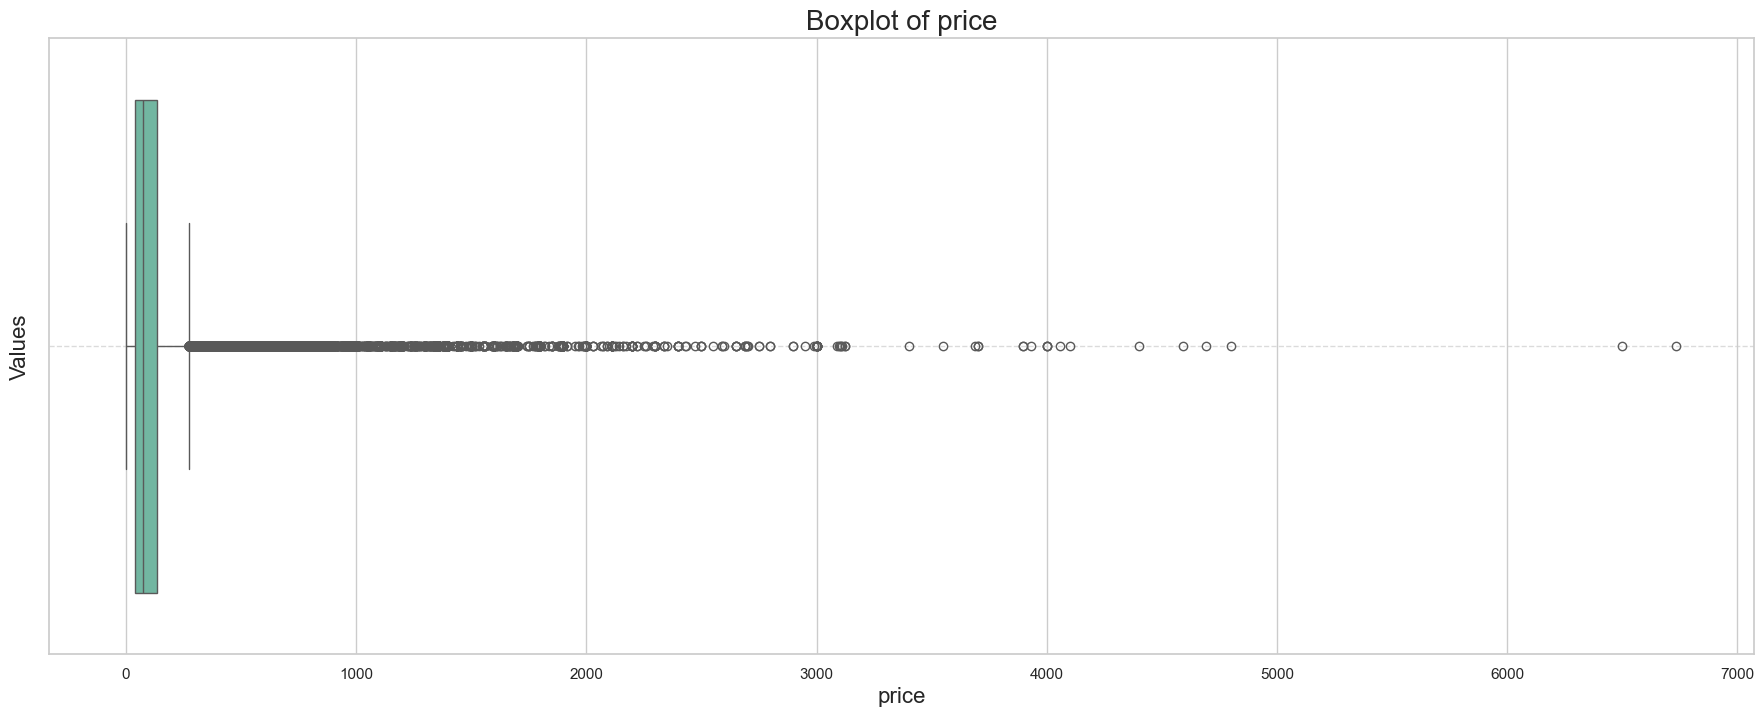

In [207]:
boxplot(column_name='price')

In [208]:
df[df['price']>6000]#['product_category_name'].value_counts()

,order_id,order_item_id,order_unique_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,shipping_duration,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_zone,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,Kg,seller_id,seller_zip_code_prefix,seller_city,seller_state,seller_zone,payment_sequential,payment_type,payment_installments,installments_price,price,freight_value,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,day_of_purchase,month_of_purchase,year_of_purchase,month/year_of_purchase,purchase_approval_time,difference_sought_and_expected
97149,0812eb902a67711a1cb742b3cdaa65ae,1,0812eb902a67711a1cb742b3cdaa65ae-1,delivered,2017-02-12 20:37:36,2017-02-12 20:45:12,2017-02-16 09:23:13,2017-03-03 14:23:18,2017-03-09 00:00:00,2017-02-16 20:37:36,18 days 17:45:42,c6e2731c5b391845f6800c97401a43a9,dc4802a71eae9be1dd28f5d788ceb526,79042,campo grande,MS,Centro-Oeste,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,31.0,875.0,2.0,30000.0,60.0,61.0,33.0,30.0,e3b4998c7a498169dc7bce44e6bb6277,3635,sao paulo,SP,Sudeste,1,credit_card,8,866.125,6735.0,194.31,6929.31,e2fbd9f0ef7b724c7ecb351601a857e7,5,NaN,"Mesmo a máquina ter vindo errada, já se pronti...",2017-03-04,2017-03-04 21:40:41,Sunday,February,2017,February-2017,0 days 00:07:36,-19 days +06:14:18
113189,f5136e38d1a14a4dbd87dff67da82701,1,f5136e38d1a14a4dbd87dff67da82701-1,delivered,2017-05-24 18:14:34,2017-05-26 02:45:17,2017-05-26 11:20:47,2017-06-05 17:09:48,2017-06-28 00:00:00,2017-06-15 02:45:17,11 days 22:55:14,3fd6777bbce08a352fddd04e4a7cc8f6,ff4159b92c40ebe40454e3e6a7c35ed6,17506,marilia,SP,Sudeste,1bdf5e6731585cf01aa8169c7028d6ad,artes,28.0,3954.0,2.0,7400.0,47.0,25.0,25.0,7.4,ee27a8f15b1dded4d213a468ba4eb391,74210,goiania,GO,Centro-Oeste,1,boleto,1,6727.000,6499.0,227.66,6726.66,1b73e6c7cd135008ebeb18404b776ddc,5,NaN,NaN,2017-06-06,2017-06-07 19:35:23,Wednesday,May,2017,May-2017,1 days 08:30:43,-12 days +01:04:46


C:\Users\schit\AppData\Local\Temp\ipykernel_10388\3713902240.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




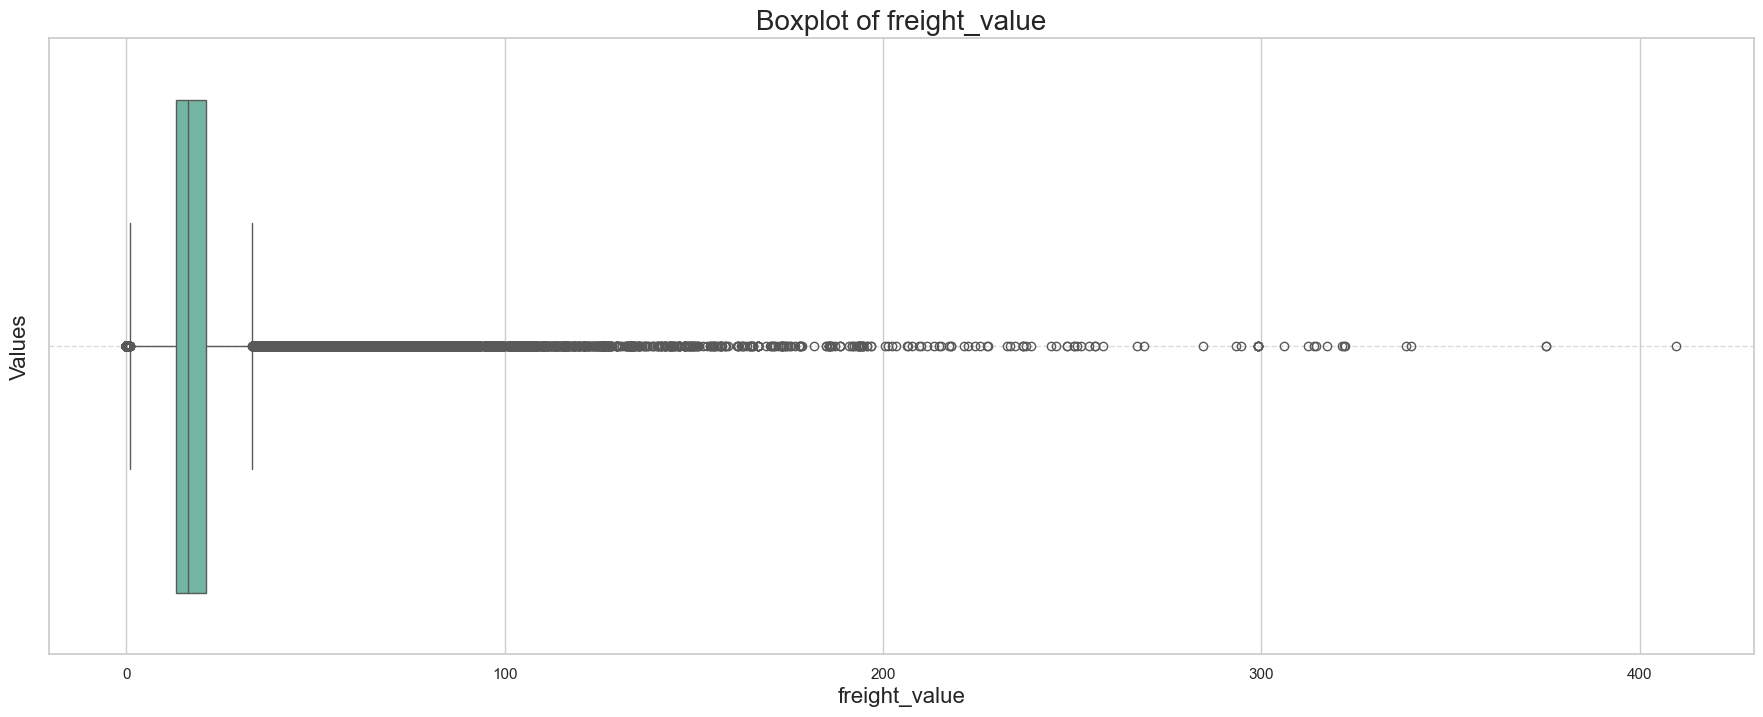

In [209]:
boxplot(column_name='freight_value')

In [210]:
df[df['freight_value']>300]['product_category_name'].value_counts()

product_category_name
beleza_saude                         5
utilidades_domesticas                3
bebes                                2
construcao_ferramentas_construcao    2
industria_comercio_e_negocios        1
                                    ..
esporte_lazer                        0
fashion_bolsas_e_acessorios          0
fashion_calcados                     0
fashion_esporte                      0
fashion_roupa_feminina               0
Name: count, Length: 73, dtype: int64

C:\Users\schit\AppData\Local\Temp\ipykernel_10388\3713902240.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




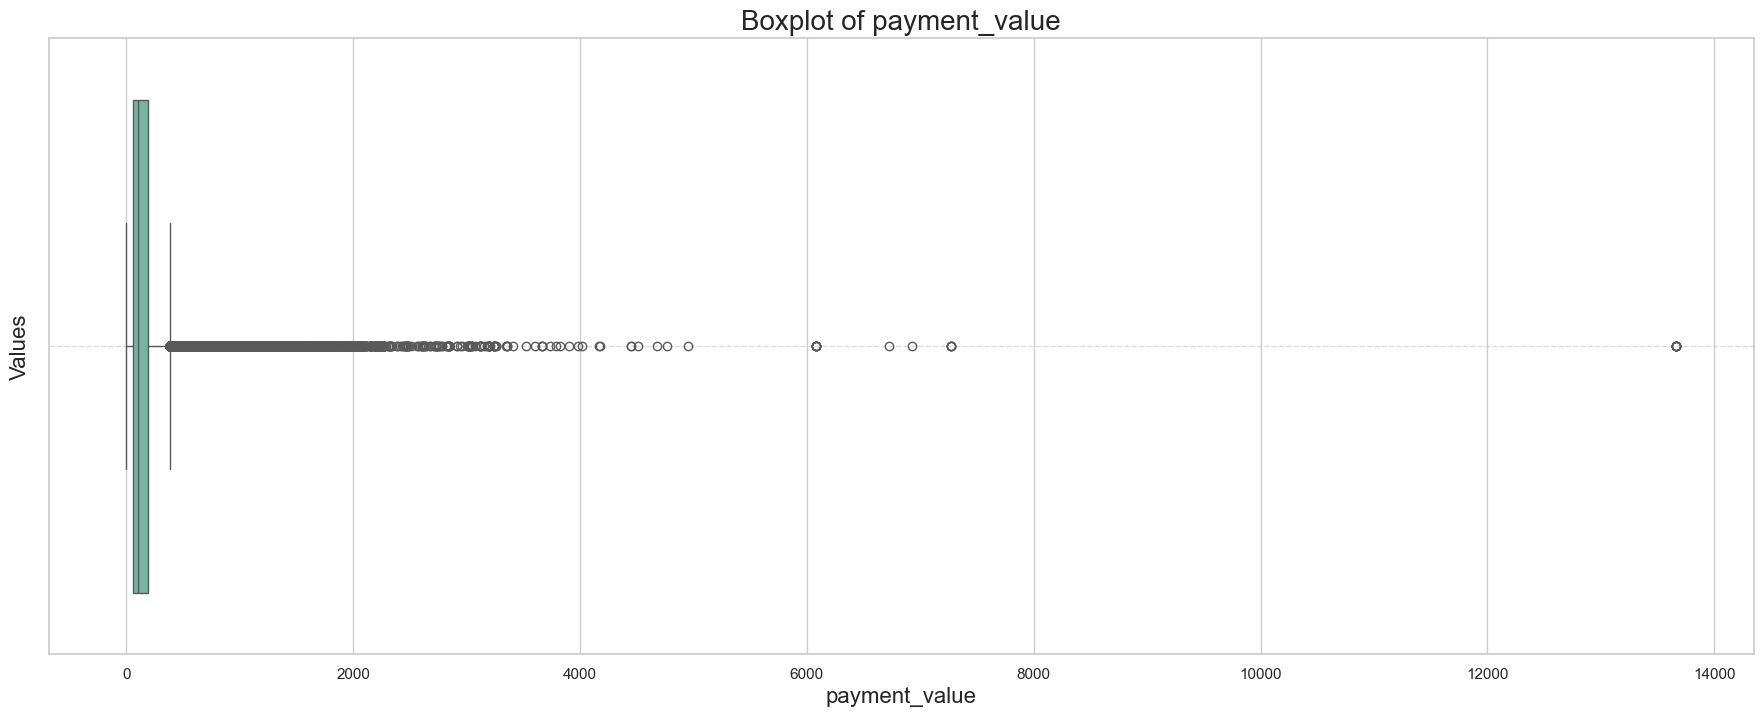

In [211]:
boxplot(column_name='payment_value')

In [212]:
df[df['payment_value'] > df['price'] + df['freight_value']].head()

,order_id,order_item_id,order_unique_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,shipping_duration,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_zone,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,Kg,seller_id,seller_zip_code_prefix,seller_city,seller_state,seller_zone,payment_sequential,payment_type,payment_installments,installments_price,price,freight_value,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,day_of_purchase,month_of_purchase,year_of_purchase,month/year_of_purchase,purchase_approval_time,difference_sought_and_expected
7,c9ef97d2854afe64a3b4488bc2836af6,2,c9ef97d2854afe64a3b4488bc2836af6-2,delivered,2017-08-05 16:59:05,2017-08-08 04:25:34,2017-08-10 16:40:11,2017-08-14 18:13:03,2017-09-06 00:00:00,2017-08-14 04:25:34,9 days 01:13:58,0a29abf475fb8039d2775913d6f0b6f0,840f10bde3c94907105e032d9c2fec3b,75903,rio verde,GO,Centro-Oeste,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,0.650,48436dade18ac8b2bce089ec2a041202,27277,volta redonda,SP,Sudeste,1,boleto,1,154.000000,58.9,18.12,153.75,dbacd3ac90ace7ad49fe8b31bbad2808,5,NaN,NaN,2017-08-15,2017-08-24 19:35:04,Saturday,August,2017,August-2017,2 days 11:26:29,-10 days +22:46:02
8,c9ef97d2854afe64a3b4488bc2836af6,1,c9ef97d2854afe64a3b4488bc2836af6-1,delivered,2017-08-05 16:59:05,2017-08-08 04:25:34,2017-08-10 16:40:11,2017-08-14 18:13:03,2017-09-06 00:00:00,2017-08-14 04:25:34,9 days 01:13:58,0a29abf475fb8039d2775913d6f0b6f0,840f10bde3c94907105e032d9c2fec3b,75903,rio verde,GO,Centro-Oeste,436c8d57ff8d4aa254318e9bd9b48c83,cool_stuff,54.0,599.0,6.0,530.0,30.0,9.0,14.0,0.530,48436dade18ac8b2bce089ec2a041202,27277,volta redonda,SP,Sudeste,1,boleto,1,154.000000,58.9,17.83,153.75,dbacd3ac90ace7ad49fe8b31bbad2808,5,NaN,NaN,2017-08-15,2017-08-24 19:35:04,Saturday,August,2017,August-2017,2 days 11:26:29,-10 days +22:46:02
18,d829ae9ca5e0a9749f2574b62eb7ac10,1,d829ae9ca5e0a9749f2574b62eb7ac10-1,delivered,2017-07-12 12:04:28,2017-07-13 02:56:03,2017-07-14 16:23:42,2017-08-07 17:27:41,2017-08-09 00:00:00,2017-07-19 02:56:03,26 days 05:23:13,a64e11fc5ee980cd9a2f1ac08110bc44,575083d1c98ec2938a00cd179a40f3d2,45810,porto seguro,BA,Nordeste,436c8d57ff8d4aa254318e9bd9b48c83,cool_stuff,54.0,599.0,6.0,530.0,30.0,9.0,14.0,0.530,48436dade18ac8b2bce089ec2a041202,27277,volta redonda,SP,Sudeste,1,boleto,1,168.000000,55.9,27.99,167.51,fcbfc00f9d9b164703c45ac561257463,5,NaN,NaN,2017-08-08,2017-08-09 00:00:56,Wednesday,July,2017,July-2017,0 days 14:51:35,-27 days +18:36:47
19,d829ae9ca5e0a9749f2574b62eb7ac10,2,d829ae9ca5e0a9749f2574b62eb7ac10-2,delivered,2017-07-12 12:04:28,2017-07-13 02:56:03,2017-07-14 16:23:42,2017-08-07 17:27:41,2017-08-09 00:00:00,2017-07-19 02:56:03,26 days 05:23:13,a64e11fc5ee980cd9a2f1ac08110bc44,575083d1c98ec2938a00cd179a40f3d2,45810,porto seguro,BA,Nordeste,7f1a77bec0639e473392e91a504272a5,cool_stuff,57.0,605.0,4.0,575.0,30.0,11.0,17.0,0.575,48436dade18ac8b2bce089ec2a041202,27277,volta redonda,SP,Sudeste,1,boleto,1,168.000000,55.9,27.72,167.51,fcbfc00f9d9b164703c45ac561257463,5,NaN,NaN,2017-08-08,2017-08-09 00:00:56,Wednesday,July,2017,July-2017,0 days 14:51:35,-27 days +18:36:47
24,a975758d17a9e095a496f4283d9c3aca,1,a975758d17a9e095a496f4283d9c3aca-1,delivered,2017-08-03 14:34:26,2017-08-03 15:50:18,2017-08-04 18:23:43,2017-08-16 21:10:54,2017-08-25 00:00:00,2017-08-09 15:50:18,13 days 06:36:28,a90b67461a9b141f23f0b1fcb25a5639,1fab09edf6749cee5d6829be35daa13b,18276,tatui,SP,Sudeste,3e31fd1419cc4cd6adad1925e72e3a03,cool_stuff,52.0,1170.0,1.0,400.0,25.0,10.0,11.0,0.400,48436dade18ac8b2bce089ec2a041202,27277,volta redonda,SP,Sudeste,1,credit_card,3,23.666667,55.9,15.14,71.04,db

Verificamos que em alguns cadastros o valor do pagamento é maior que a soma do preço do produto e frete. Agora vamos ver com que frequência isso acontece.

In [213]:
linhas, _ = df[df['payment_value'] == (df['price'] + df['freight_value'])].shape
print(f'Valor total igual a soma do preço com o frete: {linhas}')
linhas, _ = df[df['payment_value'] < (df['price'] + df['freight_value'])].shape
print(f'Valor total menor que a soma do preço com o frete: {linhas}')
linhas, _ = df[df['payment_value'] > (df['price'] + df['freight_value'])].shape
print(f'Valor total maior que a soma do preço com o frete: {linhas}')

Valor total igual a soma do preço com o frete: 67026
Valor total menor que a soma do preço com o frete: 15236
Valor total maior que a soma do preço com o frete: 30954


In [214]:
df[df['order_id'] == '03caa2c082116e1d31e67e9ae3700499'][['order_id', 'order_item_id', 'product_id', 
                                                          'price', 'freight_value', 'payment_value']]

,order_id,order_item_id,product_id,price,freight_value,payment_value
86040,03caa2c082116e1d31e67e9ae3700499,1,5769ef0a239114ac3a854af00df129e4,1680.0,28.01,13664.08
86041,03caa2c082116e1d31e67e9ae3700499,2,5769ef0a239114ac3a854af00df129e4,1680.0,28.01,13664.08
86042,03caa2c082116e1d31e67e9ae3700499,3,5769ef0a239114ac3a854af00df129e4,1680.0,28.01,13664.08
86043,03caa2c082116e1d31e67e9ae3700499,4,5769ef0a239114ac3a854af00df129e4,1680.0,28.01,13664.08
86044,03caa2c082116e1d31e67e9ae3700499,5,5769ef0a239114ac3a854af00df129e4,1680.0,28.01,13664.08
86045,03caa2c082116e1d31e67e9ae3700499,6,5769ef0a239114ac3a854af00df129e4,1680.0,28.01,13664.08
86046,03caa2c082116e1d31e67e9ae3700499,7,5769ef0a239114ac3a854af00df129e4,1680.0,28.01,13664.08
86047,03caa2c082116e1d31e67e9ae3700499,8,5769ef0a239114ac3a854af00df129e4,1680.0,28.01,13664.08


`Não eram Outliers` porque o valor total é a soma do preço mais frete multiplicado pela quantidade de produtos adquiridos naquele pedido

In [215]:
(1680.0 * 8) + (28.01 * 8)

13664.08

C:\Users\schit\AppData\Local\Temp\ipykernel_10388\3713902240.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




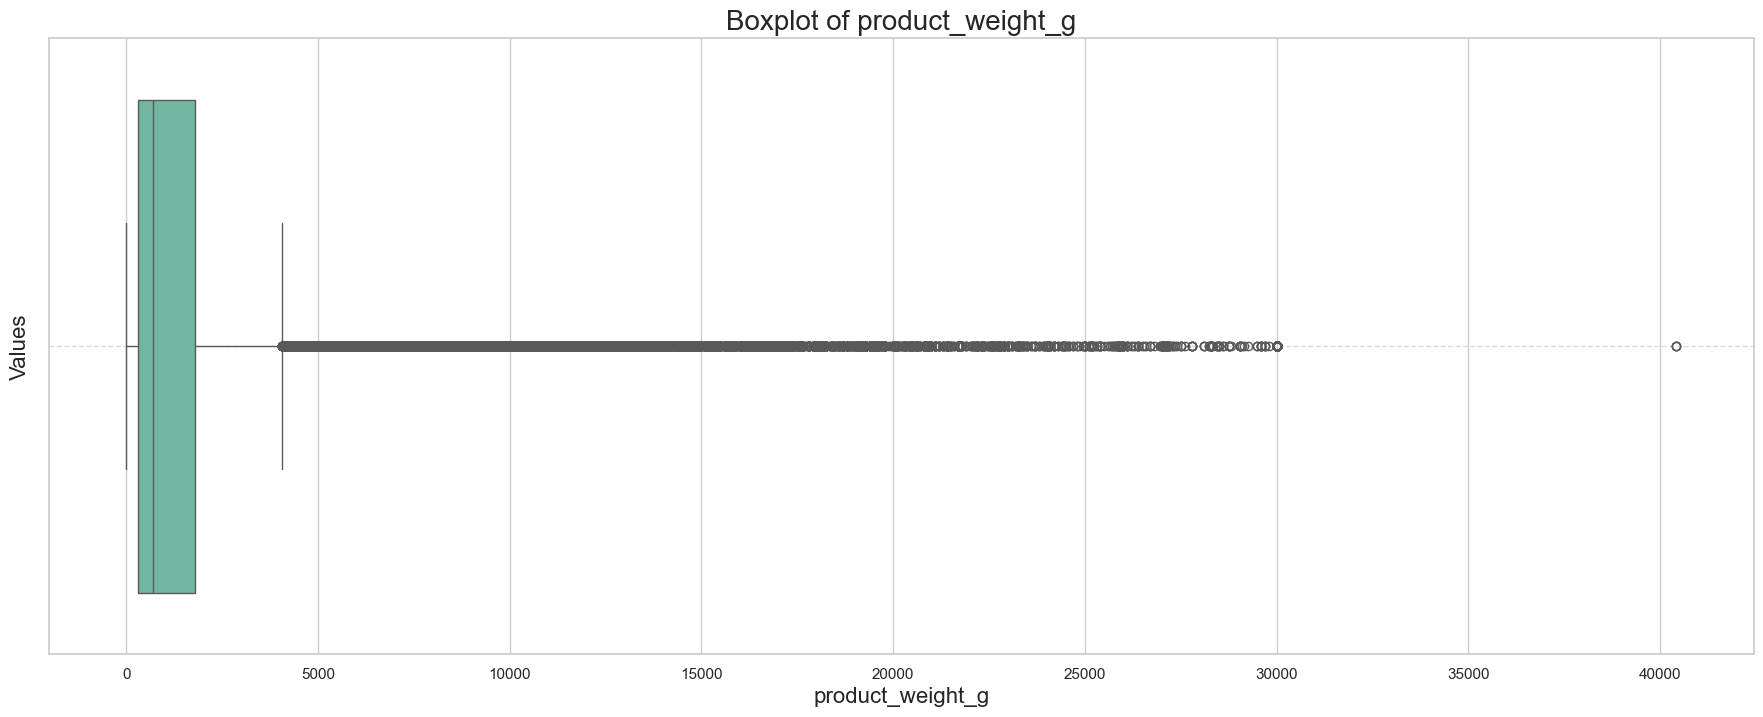

In [216]:
boxplot(column_name='product_weight_g')

In [217]:
df[df['product_weight_g']>35000]['product_category_name'].value_counts()

product_category_name
cama_mesa_banho                                   3
agro_industria_e_comercio                         0
livros_importados                                 0
moveis_cozinha_area_de_servico_jantar_e_jardim    0
moveis_colchao_e_estofado                         0
                                                 ..
construcao_ferramentas_jardim                     0
construcao_ferramentas_iluminacao                 0
construcao_ferramentas_ferramentas                0
construcao_ferramentas_construcao                 0
utilidades_domesticas                             0
Name: count, Length: 73, dtype: int64

C:\Users\schit\AppData\Local\Temp\ipykernel_10388\3713902240.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




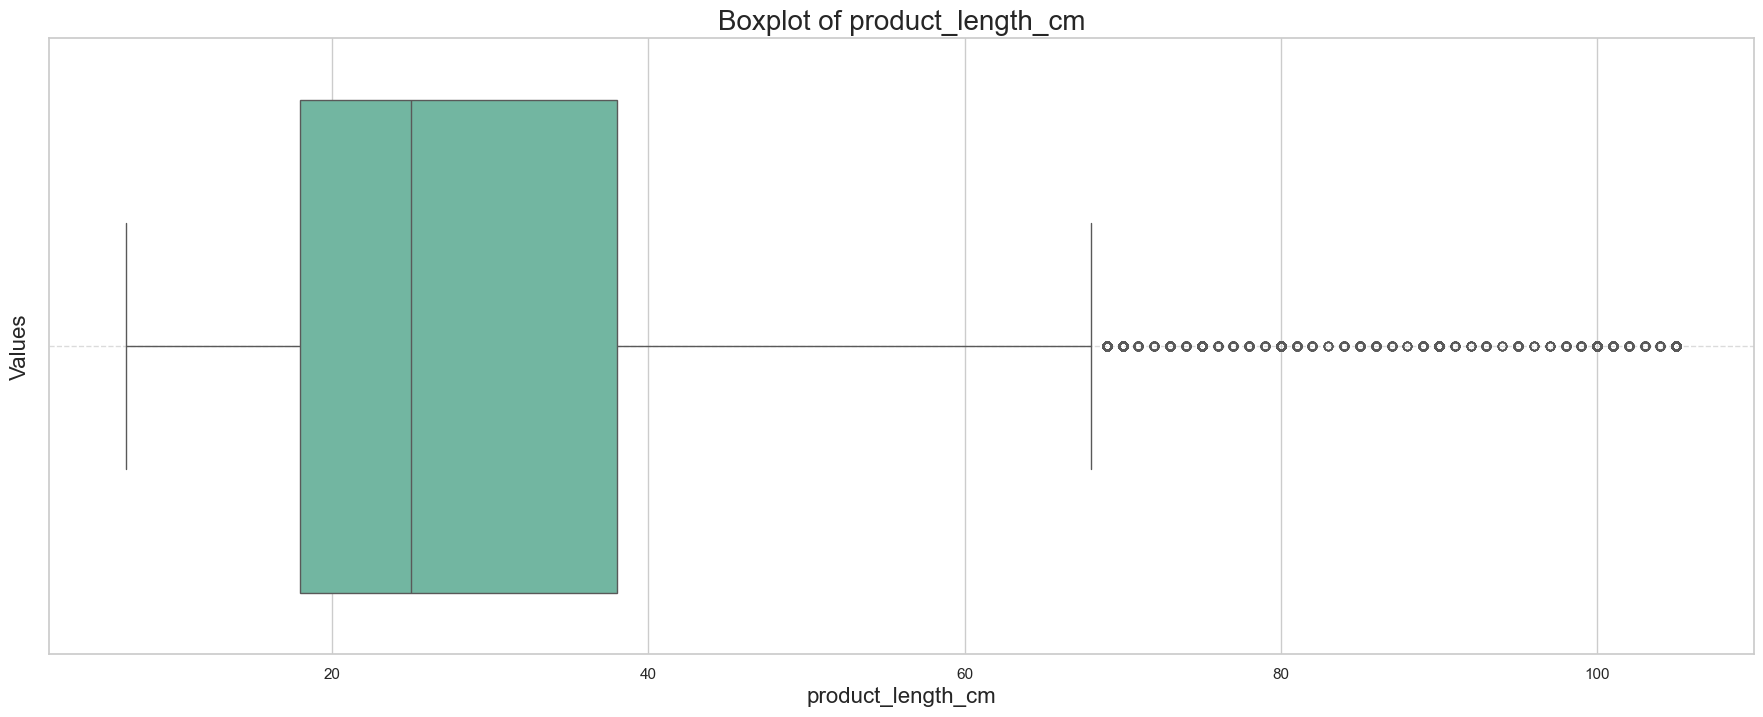

In [218]:
boxplot(column_name='product_length_cm')

C:\Users\schit\AppData\Local\Temp\ipykernel_10388\3713902240.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




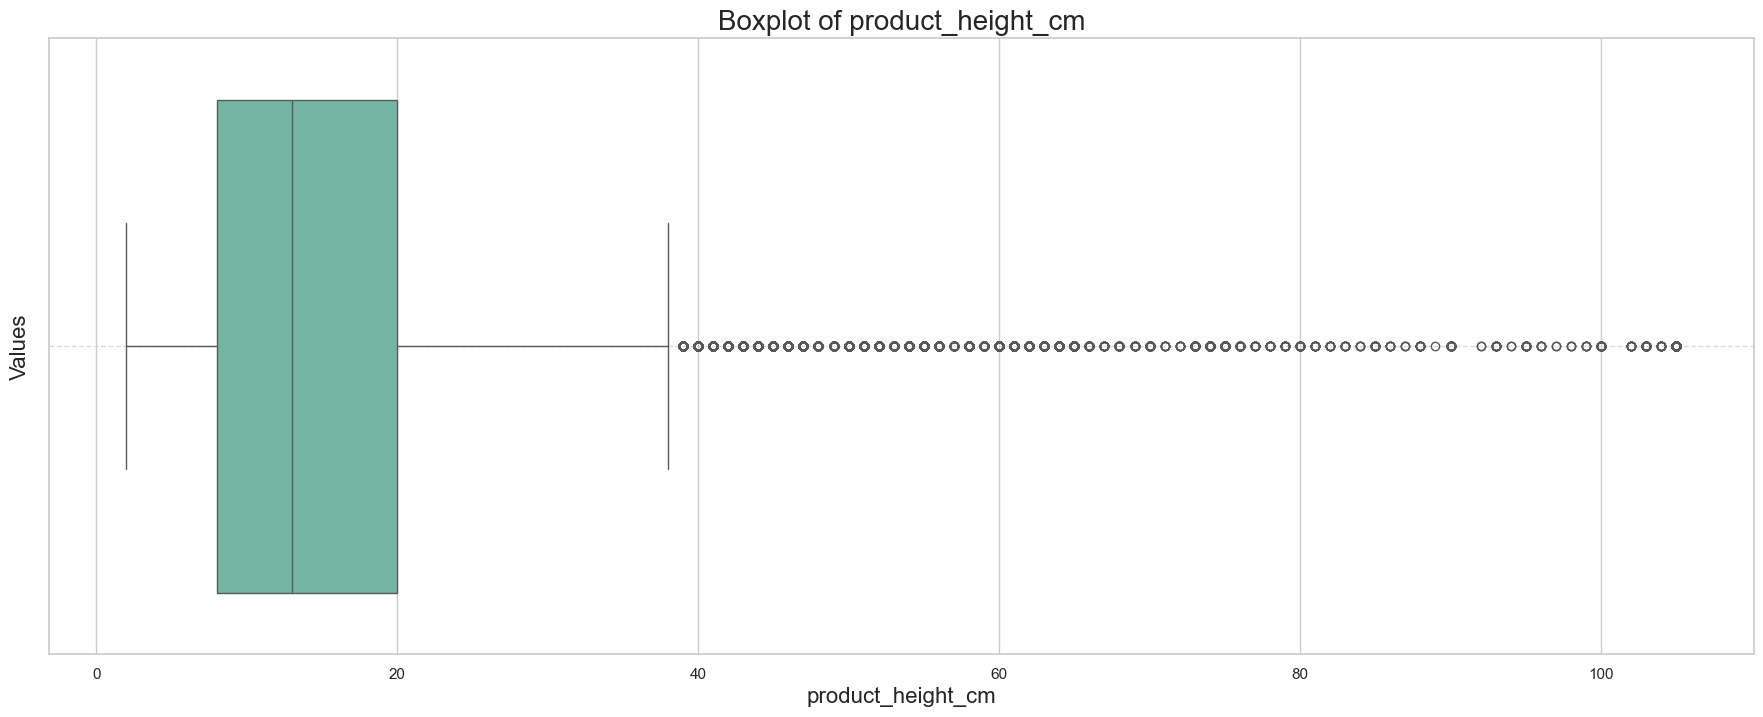

In [219]:
boxplot(column_name='product_height_cm')

C:\Users\schit\AppData\Local\Temp\ipykernel_10388\3713902240.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




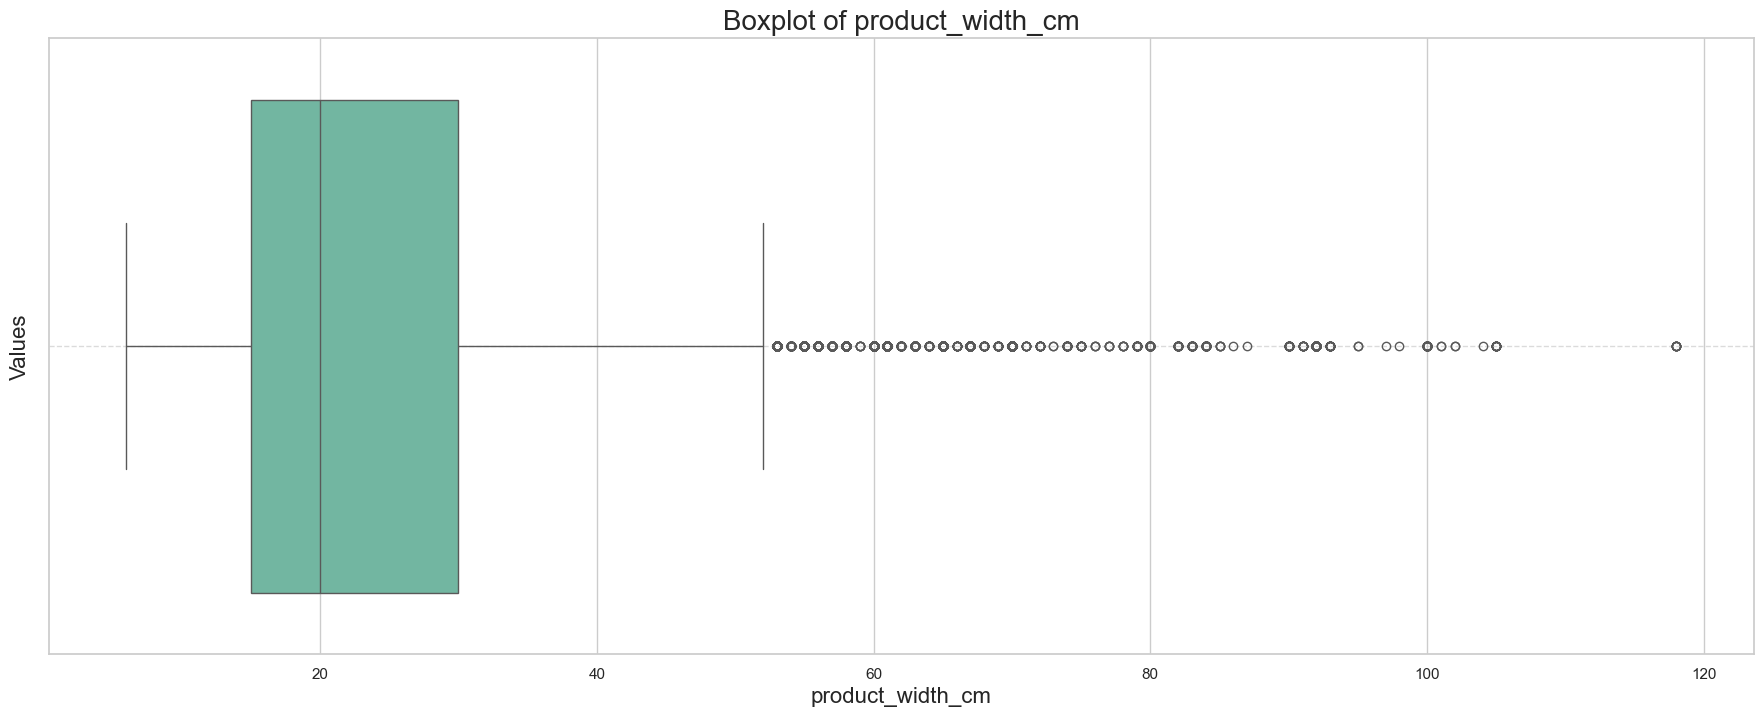

In [220]:
boxplot(column_name='product_width_cm')

C:\Users\schit\AppData\Local\Temp\ipykernel_10388\3713902240.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




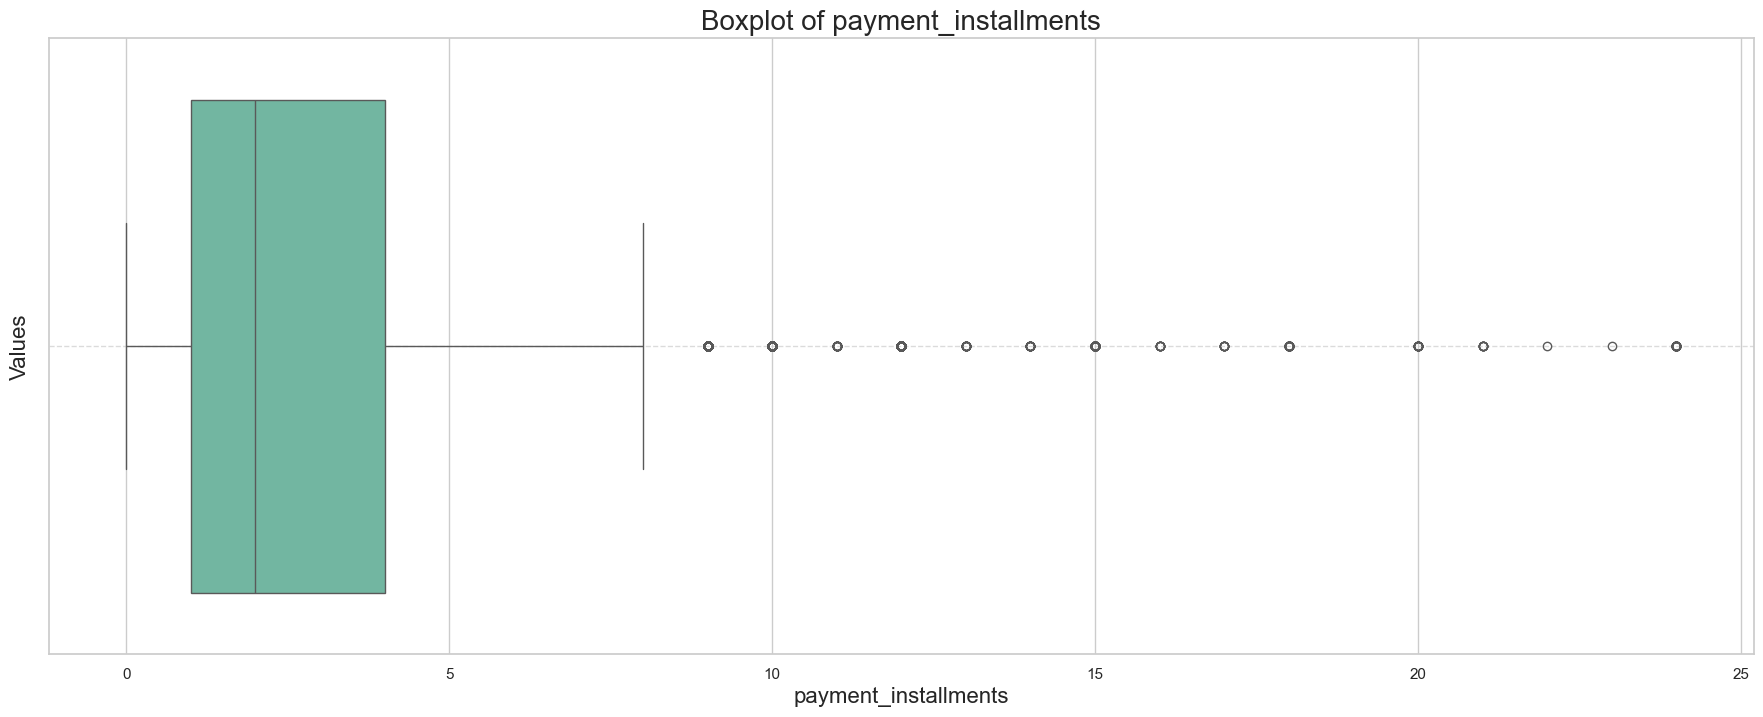

In [221]:
boxplot(column_name='payment_installments')

### Histograma das colunas numéricas

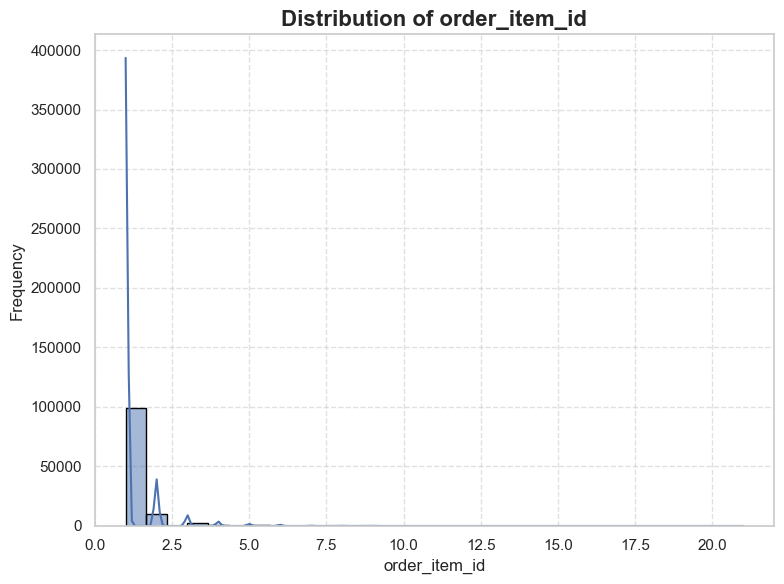

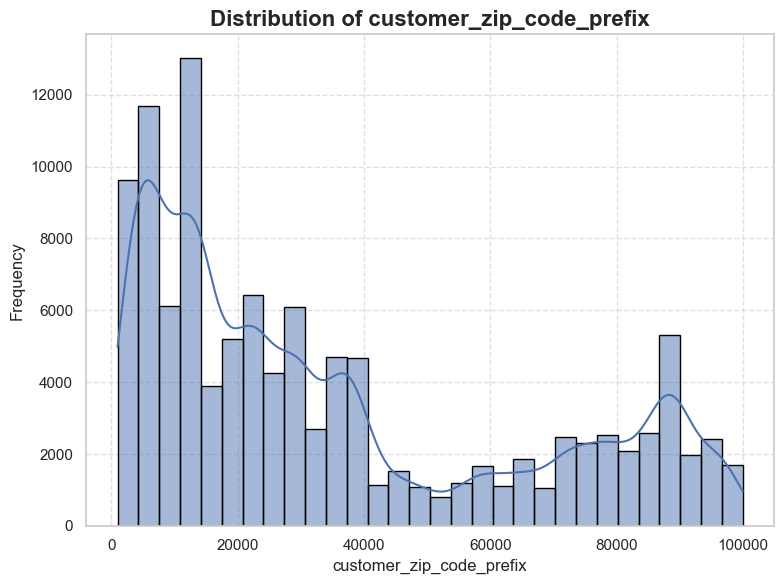

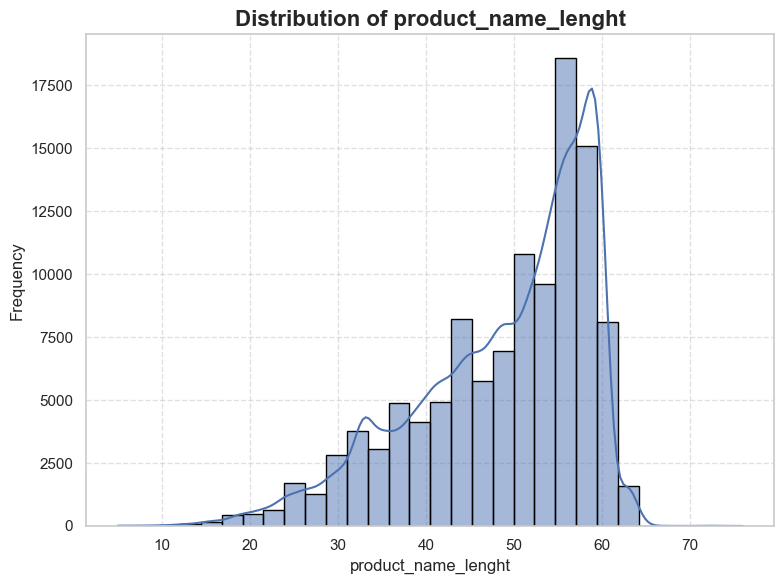

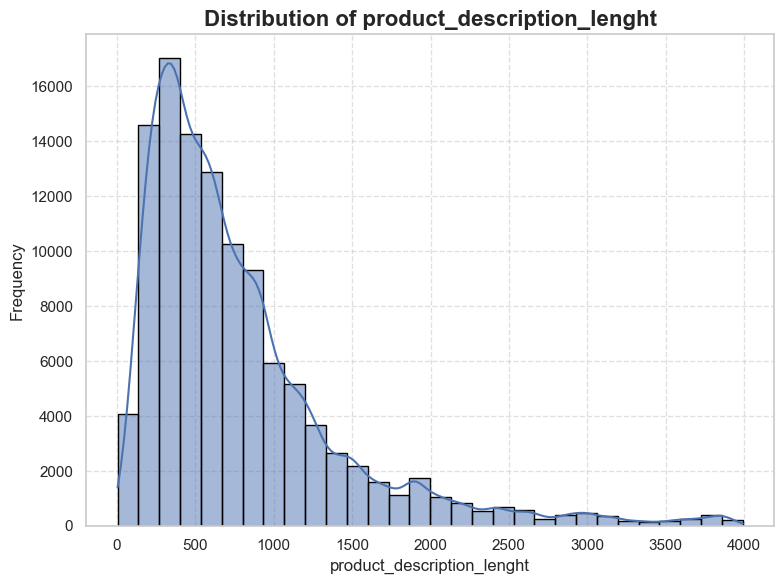

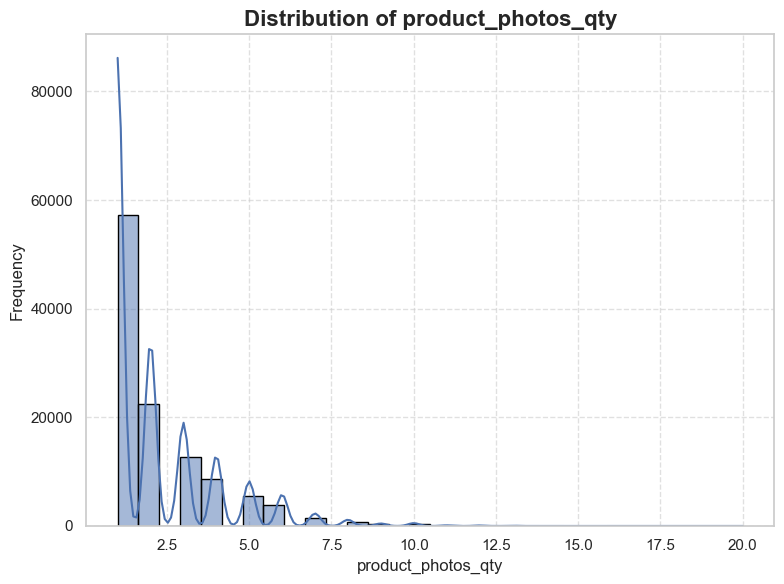

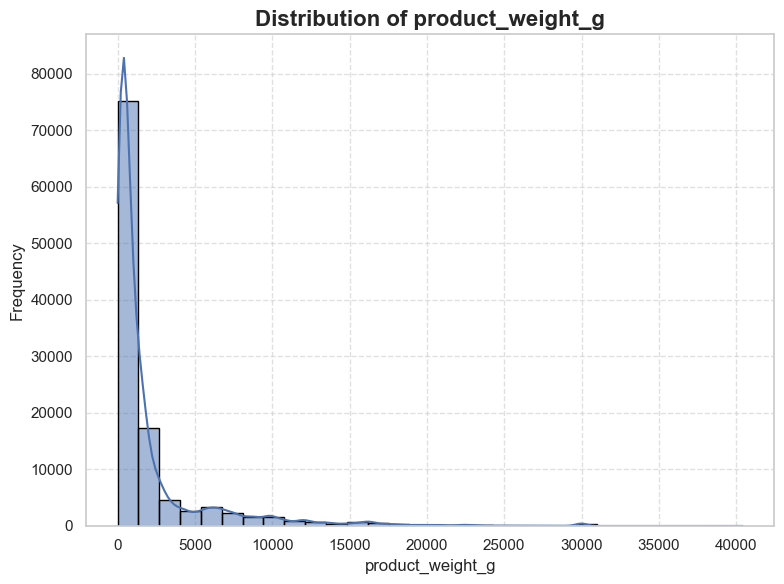

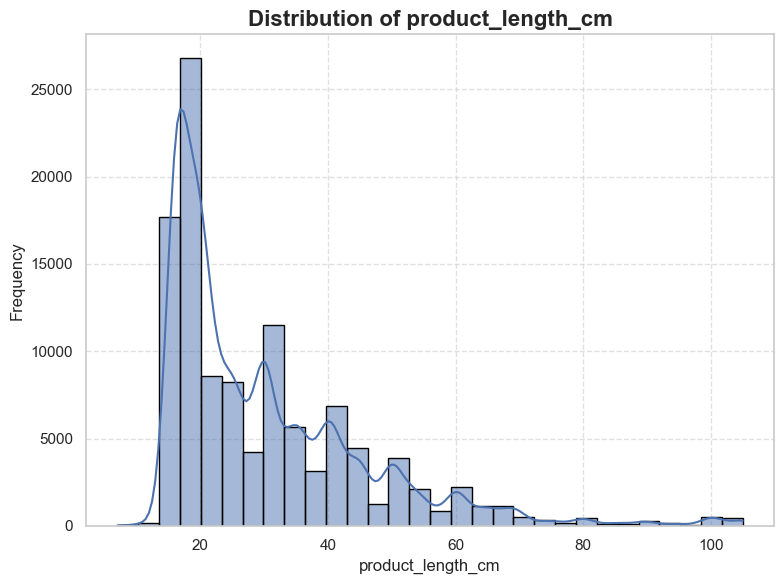

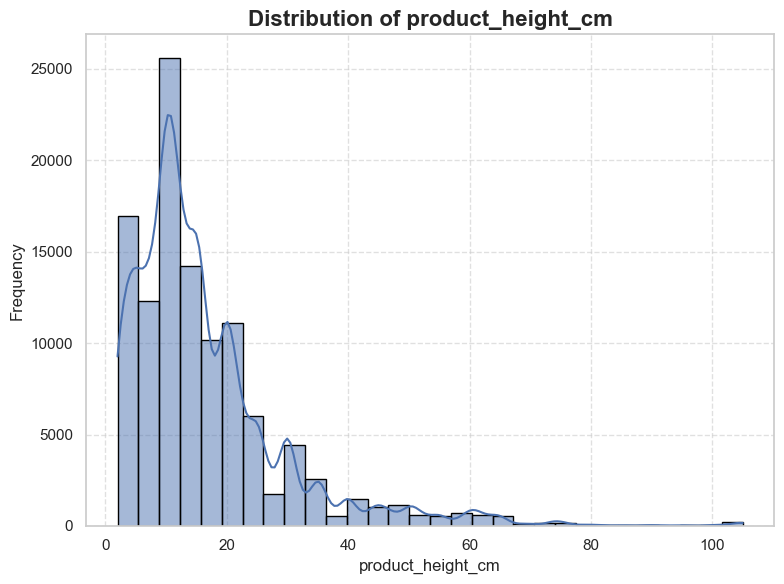

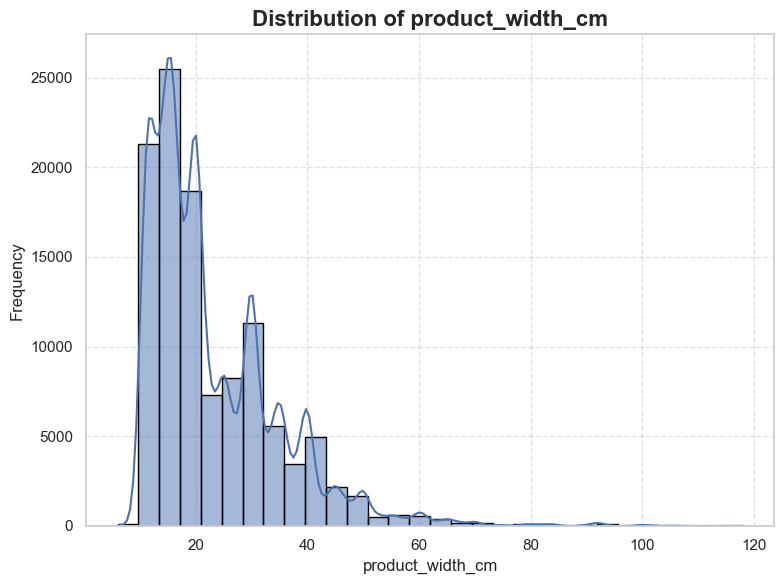

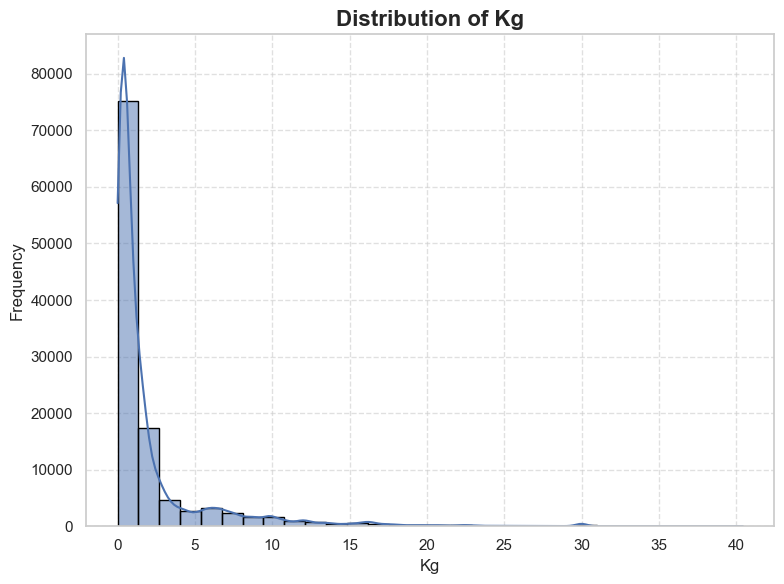

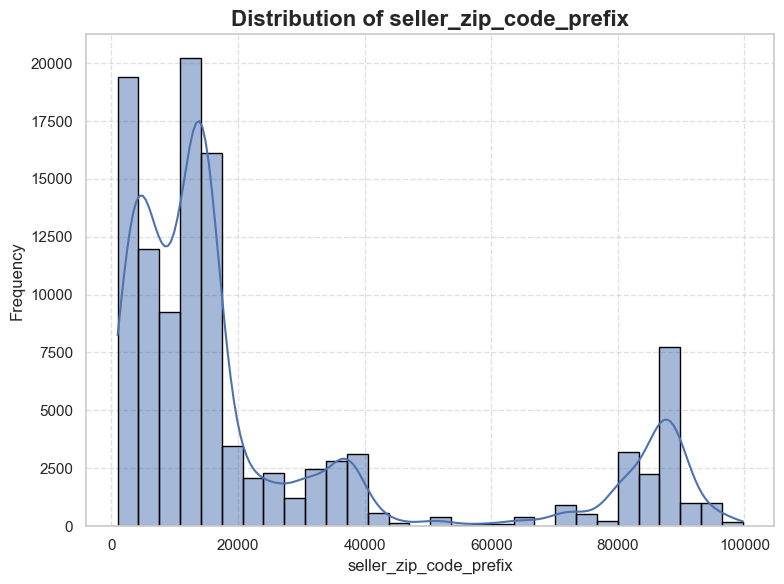

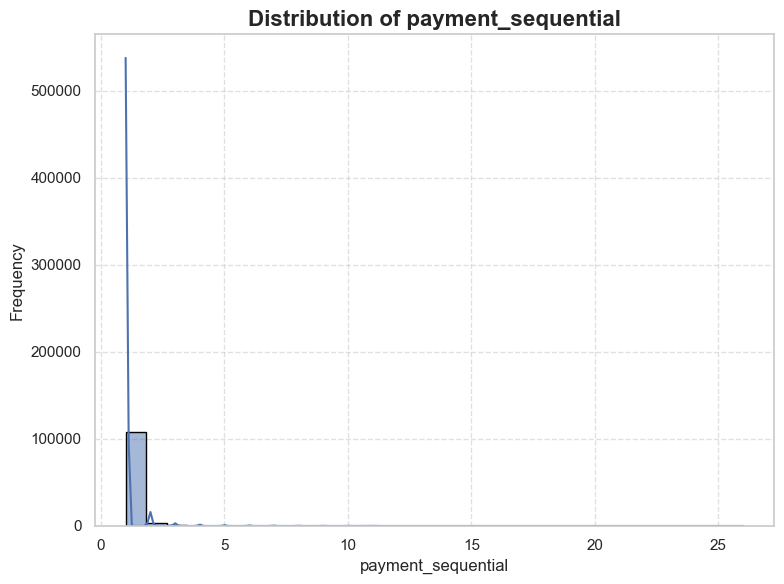

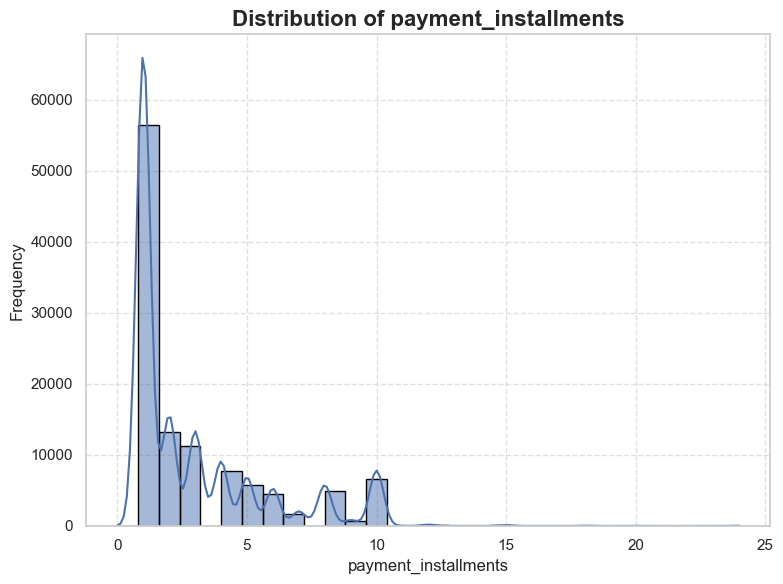

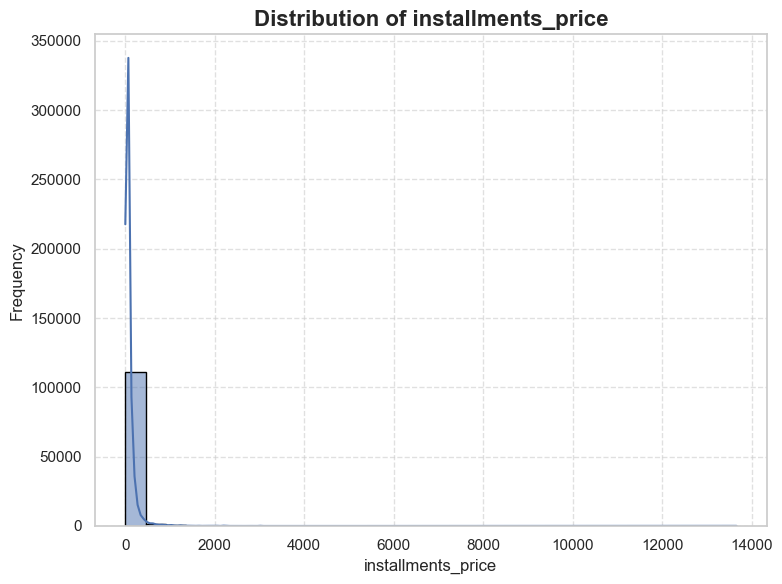

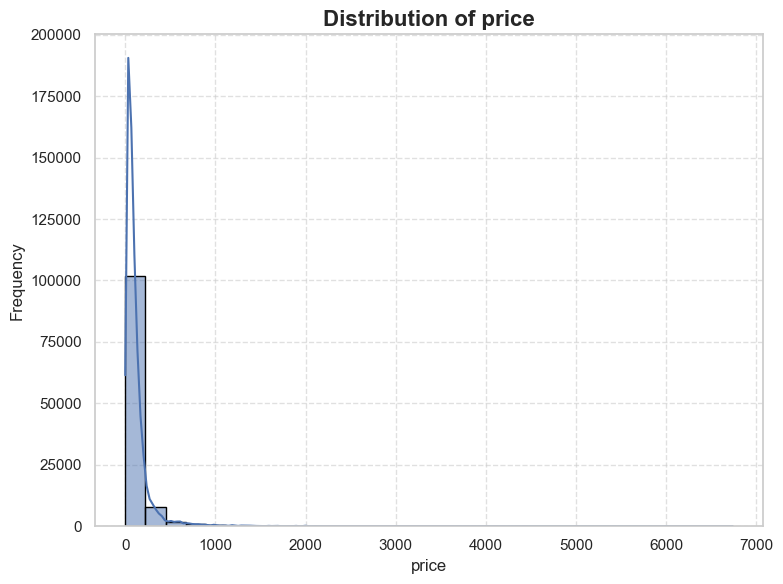

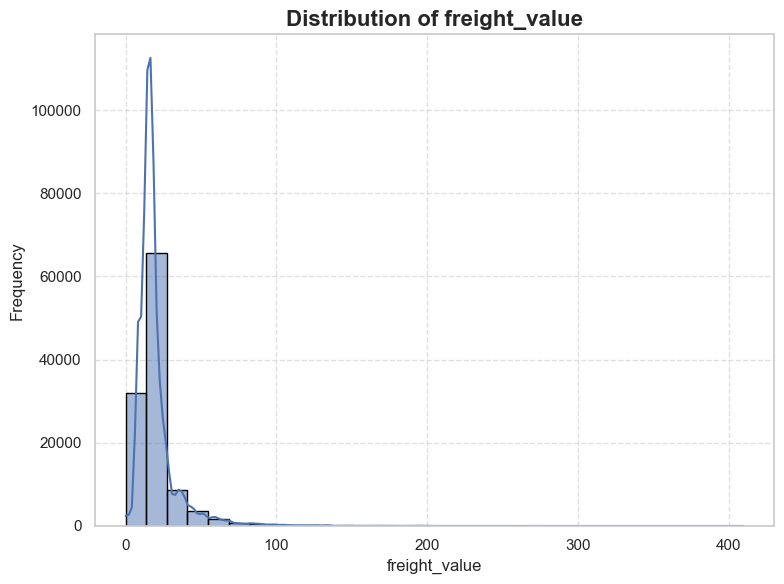

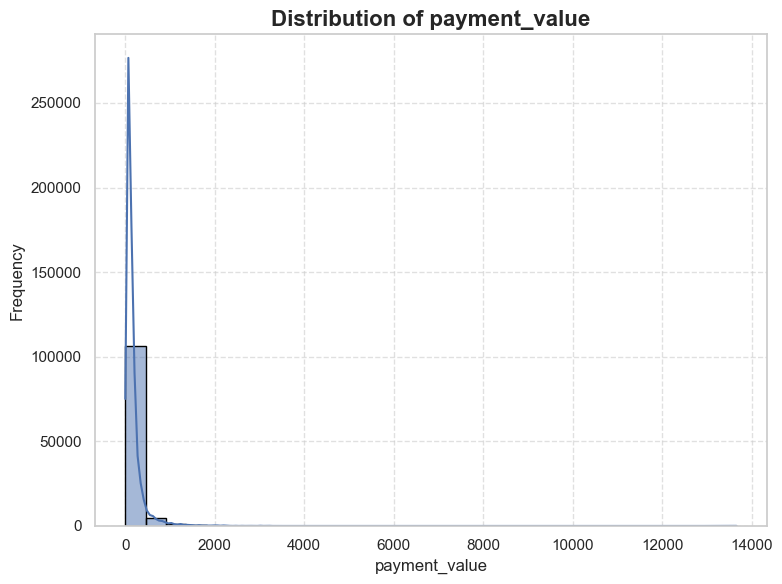

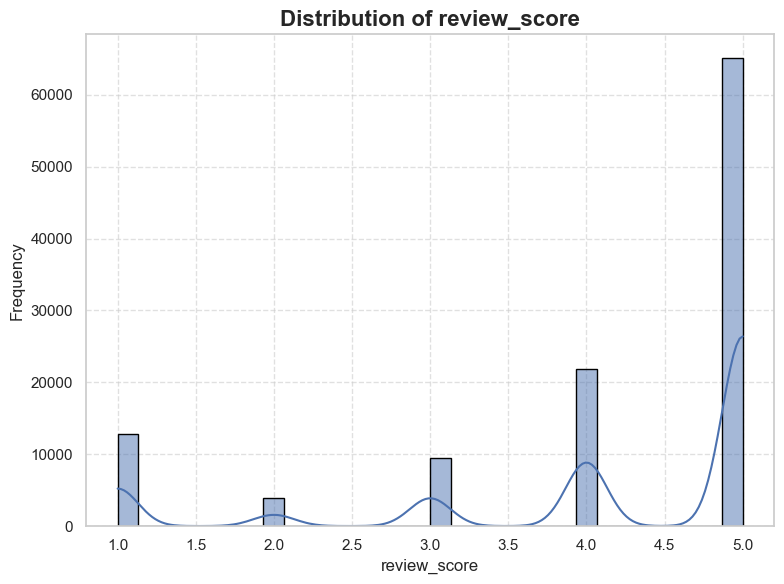

In [222]:
def value_to_histogram(lista: list):
    sns.set(style="whitegrid")  # Estilo mais limpo para os gráficos
    for coluna in lista:
        plt.figure(figsize=(8, 6))  # Tamanho da figura ajustado
        sns.histplot(data=df[coluna], kde=True, color='b', bins=30, edgecolor='black')  # Adicionei mais bins e uma borda
        plt.title(f'Distribution of {coluna}', fontsize=16, weight='bold')  # Título mais descritivo
        plt.xlabel(f'{coluna}', fontsize=12)  # Rótulo do eixo X
        plt.ylabel('Frequency', fontsize=12)  # Rótulo do eixo Y
        plt.grid(True, linestyle='--', alpha=0.6)  # Grid discreto
        plt.tight_layout()  # Ajuste para evitar sobreposição
        plt.show()
        plt.close('all')

value_to_histogram(list(df.select_dtypes('number').drop(columns=['shipping_duration', 'year_of_purchase', 
                                                                 'purchase_approval_time', 'difference_sought_and_expected']).columns))

## Métricas

### Describe

- Colunas categóricas

In [223]:
df.select_dtypes(include=['category']).describe().transpose()

,count,unique,top,freq
order_unique_id,113216,107825,ccf804e764ed5650cd8759557269dc13-1,26
order_status,113216,2,delivered,113209
order_estimated_delivery_date,113216,444,2017-12-20 00:00:00,640
customer_id,113216,94490,270c23a11d024a44c896d1894b261a83,63
customer_unique_id,113216,91484,9a736b248f67d166d2fbb006bcb877c3,75
customer_city,113216,4071,sao paulo,17872
customer_state,113216,27,SP,47823
customer_zone,113216,5,Sudeste,77880
product_id,113216,31485,aca2eb7d00ea1a7b8ebd4e68314663af,526
product_category_name,113216,73,cama_mesa_banho,11684


- Colunas numéricas

In [224]:
df.describe().transpose()

c:\Users\schit\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning:

invalid value encountered in subtract



,count,mean,min,25%,50%,75%,max,std
order_item_id,113216.0,1.195052,1.0,1.0,1.0,1.0,21.0,0.687474
order_purchase_timestamp,113216,2018-01-01 08:15:45.371564288,2016-10-03 09:44:50,2017-09-13 14:15:18.249999872,2018-01-20 10:14:21,2018-05-05 14:34:27.750000128,2018-08-29 15:00:37,NaN
order_approved_at,113216,2018-01-01 18:41:49.277142784,2016-10-04 09:43:32,2017-09-13 22:05:48.500000,2018-01-20 16:00:50,2018-05-05 21:10:36.249999872,2018-08-29 15:10:26,NaN
order_delivered_carrier_date,113216,2018-01-04 14:48:56.103819264,2016-10-08 10:34:01,2017-09-15 20:07:55,2018-01-24 00:42:35,2018-05-08 14:12:00,2018-09-11 19:48:28,NaN
order_delivered_customer_date,113216,2018-01-13 18:50:41.457806336,2016-10-11 13:46:32,2017-09-25 18:40:11.500000,2018-02-02 02:43:28,2018-05-15 20:09:21.500000,2018-10-17 13:22:46,NaN
shipping_limit_date,113216,2018-01-07 22:50:09.162247424,2016-10-08 10:34:01,2017-09-20 13:28:59.500000,2018-01-26 14:15:38.500000,2018-05-10 19:50:43.249999872,2020-04-09 22:35:08,NaN
shipping_duration,113216,12 days 10:34:56.086242227,0 days 12:48:07,6 days 17:43:58.750000,10 days 04:30:32,15 days 12:03:10.750000,208 days 08:26:32,9 days 08:31:37.822528835
customer_zip_code_prefix,113216.0,35084.548703,1003.0,11310.0,24315.0,58844.25,99980.0,29867.207356
product_name_lenght,113216.0,48.804224,5.0,42.0,52.0,57.0,76.0,10.015776
product_description_lenght,113216.0,784.72571,4.0,346.0,600.0,982.0,3992.0,650.300338


### Matriz de correlação

<Axes: >

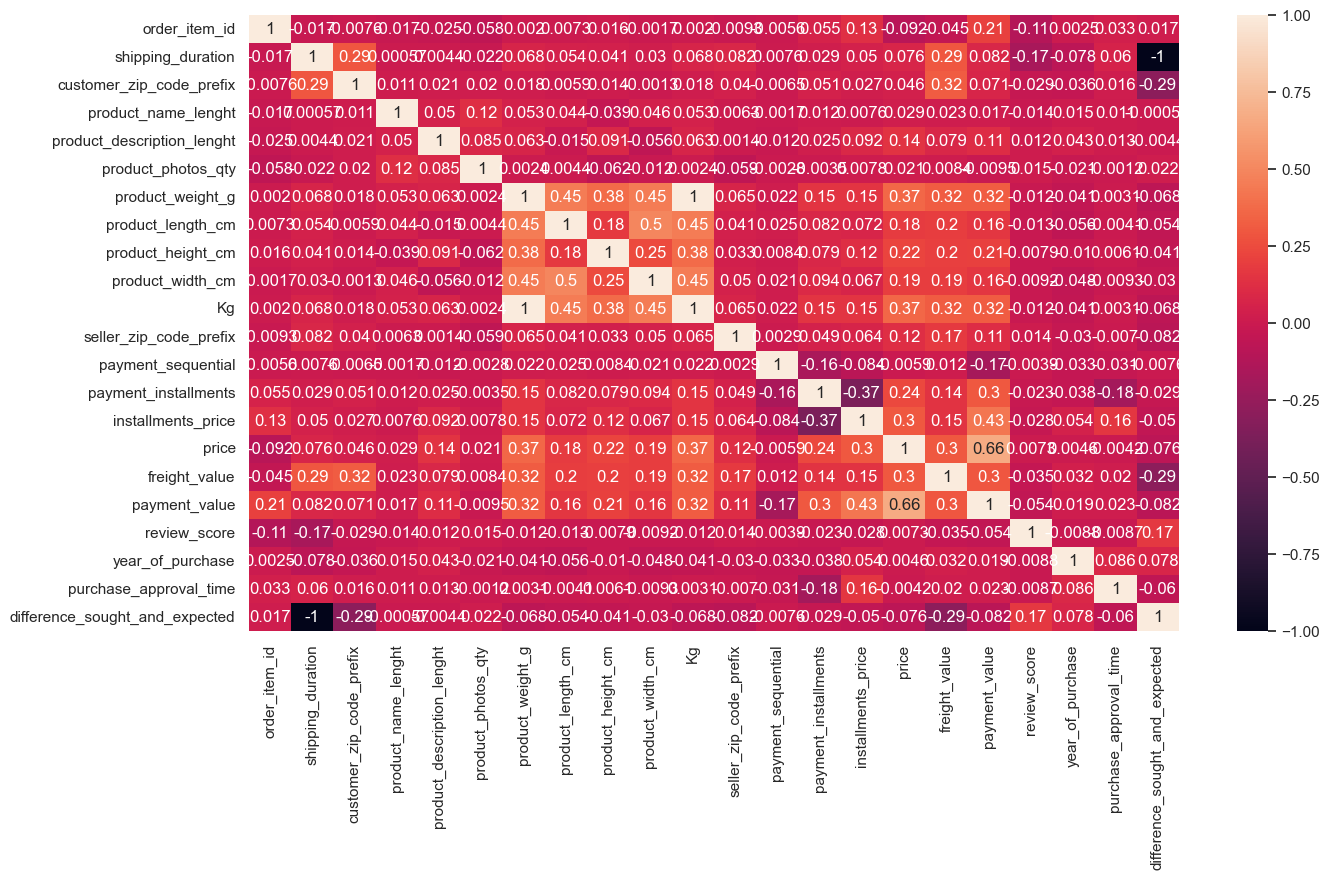

In [225]:
numeric_df = df.select_dtypes(include=['number'])

corr = numeric_df.corr(method='kendall')
plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True)

In [226]:
start = df['order_purchase_timestamp'].min()
finished = df['order_purchase_timestamp'].max()

print(f"{start} até {finished} --> Total de {finished - start}")

2016-10-03 09:44:50 até 2018-08-29 15:00:37 --> Total de 695 days 05:15:47


### preço dos produtos e frete

In [227]:
price_dic = df.groupby('month/year_of_purchase')['price'].mean().round().to_dict()
freight_value_dic = df.groupby('month/year_of_purchase')['freight_value'].mean().round().to_dict()
payment_value_dic = df.groupby('month/year_of_purchase')['payment_value'].mean().round().to_dict()

def get_month_number(month_name):
    return list(calendar.month_name).index(month_name.capitalize())

price_dic = sorted(price_dic.items(), key=lambda x: (int(x[0].split('-')[1]), get_month_number(x[0].split('-')[0])))
payment_value_dic = sorted(payment_value_dic.items(), key=lambda x: (int(x[0].split('-')[1]), get_month_number(x[0].split('-')[0])))
freight_value_dic = sorted(freight_value_dic.items(), key=lambda x: (int(x[0].split('-')[1]), get_month_number(x[0].split('-')[0])))

price_dic = dict(price_dic)
payment_value_dic = dict(payment_value_dic)
freight_value_dic = dict(freight_value_dic)

In [228]:
fig = go.Figure()

fig.add_scatter(x=list(price_dic.keys()), y=list(price_dic.values()), 
                mode='lines', name='price_dic')

fig.add_scatter(x=list(payment_value_dic.keys()), y=list(payment_value_dic.values()), 
                mode='lines', name='payment_value_dic')

fig.add_scatter(x=list(freight_value_dic.keys()), y=list(freight_value_dic.values()), 
                mode='lines', name='freight_value_dic')
fig.show()

---

In [229]:
def to_percent(value):
    total, _ = df.shape
    value = (float(value) / float(total)) * 100
    return value

### Como se comportou a quantidade de produtos adquiridos no período

#### Quantidade de produtos

In [230]:
product_dic_count = df.groupby('month/year_of_purchase')['order_unique_id'].count().to_dict()

def get_month_number(month_name):
    return list(calendar.month_name).index(month_name.capitalize())

product_dic_count = sorted(product_dic_count.items(), key=lambda x: (int(x[0].split('-')[1]), get_month_number(x[0].split('-')[0])))
product_dic_count = dict(product_dic_count)

In [231]:
product_dic_count_keys = list(product_dic_count.keys())
product_dic_count_values = list(product_dic_count.values())

#### Mas de um produto na mesma compra

In [232]:
product_dic = df[df['order_item_id'] > 1]
product_dic = product_dic.groupby('month/year_of_purchase')['order_unique_id'].count().to_dict()

def get_month_number(month_name):
    return list(calendar.month_name).index(month_name.capitalize())

product_dic = sorted(product_dic.items(), key=lambda x: (int(x[0].split('-')[1]), get_month_number(x[0].split('-')[0])))
product_dic = dict(product_dic)

In [233]:
product_dic_values = list(product_dic.values())

#### Pirâmide das vendas

In [234]:
product_dic_count_keys = np.array(product_dic_count_keys)
product_dic_values = np.array(product_dic_values)

In [235]:
piramide = go.Figure()

piramide.add_trace(go.Bar(x = product_dic_count_values,
                         y = product_dic_count_keys,
                         orientation = "h",
                         name = "Todos os produtos vendidos",
                         marker = dict(color = "#32CD32")))

piramide.add_trace(go.Bar(x = -product_dic_values,
                         y = product_dic_count_keys,
                         orientation = "h",
                         name = "Pedidos com mais de um produto",
                         marker = dict(color = "#E65CD9")))

piramide.update_layout(barmode = "overlay",
                      title = "Pirâmide das vendas",
                      xaxis = dict(tickvals = [-1000, 0, 500, 2000, 4000, 6000, 8000],
                                  title = "mil"),
                      plot_bgcolor = "white")

piramide.show()

### Quanto dinheiro ganhou no último período?

In [236]:
df.groupby('year_of_purchase')['price'].sum().round().to_dict()

{2016: 41671.0, 2017: 6135756.0, 2018: 7393745.0}

In [237]:
lucro_dic = df.groupby('month/year_of_purchase')['price'].sum().round().to_dict()

def get_month_number(month_name):
    return list(calendar.month_name).index(month_name.capitalize())

lucro_dic = sorted(lucro_dic.items(), key=lambda x: (int(x[0].split('-')[1]), get_month_number(x[0].split('-')[0])))
lucro_dic = dict(lucro_dic)

In [238]:
fig = px.bar(x=lucro_dic.keys(), y=lucro_dic.values(), 
              title=f"Lucro no último período: Total R${sum(list(lucro_dic.values()))}") 
fig.show()

### Preço médio do produto

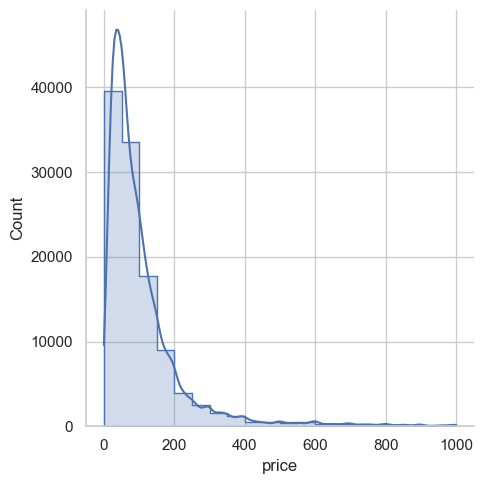

In [239]:
sns.displot(data = df[df['price'] <= 1000]
            ,alpha = .25
            ,x = 'price'
            ,bins = 20
            ,element = 'step'
            ,kde = True
           )

### Frete médio do produto

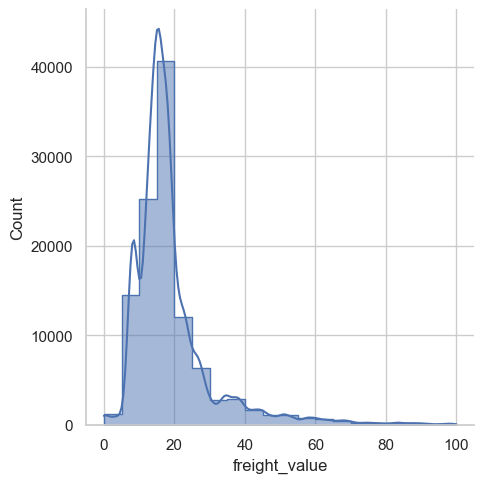

In [240]:
sns.displot(data = df[df['freight_value'] <= 100]
            ,alpha = .50
            ,x = 'freight_value'
            ,bins = 20
            ,element = 'step'
            ,kde = True
           )

### Como se comportou a quantidade de clientes e vendedores no período

In [241]:
month_year_of_purchase_sort = sorted(list(set(df['month/year_of_purchase'].to_list())), 
                              key=lambda x: (int(x.split('-')[1]), 
                              get_month_number(x.split('-')[0])))

#### Clientes

In [242]:
customer_id = []
for x in month_year_of_purchase_sort:
    df_customer = df[df['month/year_of_purchase'] == x]
    df_customer = list(set(df_customer['customer_id'].to_list()))
    customer_id.append(df_customer)

In [243]:
def new_user(periods:list):
    dic_customer = {}
    for x in periods:
        index = month_year_of_purchase_sort.index(x)
        set1 = set(sum(customer_id[:index], []))
        set2 = set(customer_id[index])
        result = len(list(set2 - set1))
        dic_customer[x] = result
    return dic_customer

new_user_customers = new_user(month_year_of_purchase_sort)

In [244]:
atividade_customers = df.groupby('month/year_of_purchase')['customer_id'].count().to_dict()

def get_month_number(month_name):
    return list(calendar.month_name).index(month_name.capitalize())

atividade_customers = sorted(atividade_customers.items(), key=lambda x: (int(x[0].split('-')[1]), get_month_number(x[0].split('-')[0])))
atividade_customers = dict(atividade_customers)

In [245]:
"""from plotly.subplots import make_subplots

nomes = list(new_user_customers.keys())
atividade_customers = list(atividade_customers.values())
new_user_customers = list(new_user_customers.values())

fig = make_subplots(specs = [[{"secondary_y": True}]])

fig.add_trace(go.Bar(x = nomes,
                    y = atividade_customers,
                    name = "atividade_customers",
                    marker_color = "#32CD32"),
             secondary_y = False)

fig.add_trace(go.Bar(x = nomes,
                    y = new_user_customers,
                    name = "new_user_customers",
                    marker_color = "yellowgreen"),
             secondary_y = False)


fig.update_xaxes(title_text = "Mês")

fig.update_yaxes(title_text = "P(mm)", secondary_y = False)
fig.update_yaxes(title_text = "T(Celsius)", secondary_y = True)


fig.update_layout(plot_bgcolor = "white",
                 yaxis2 = dict(range = [0,35]))

fig.show()"""

'from plotly.subplots import make_subplots\n\nnomes = list(new_user_customers.keys())\natividade_customers = list(atividade_customers.values())\nnew_user_customers = list(new_user_customers.values())\n\nfig = make_subplots(specs = [[{"secondary_y": True}]])\n\nfig.add_trace(go.Bar(x = nomes,\n                    y = atividade_customers,\n                    name = "atividade_customers",\n                    marker_color = "#32CD32"),\n             secondary_y = False)\n\nfig.add_trace(go.Bar(x = nomes,\n                    y = new_user_customers,\n                    name = "new_user_customers",\n                    marker_color = "yellowgreen"),\n             secondary_y = False)\n\n\nfig.update_xaxes(title_text = "Mês")\n\nfig.update_yaxes(title_text = "P(mm)", secondary_y = False)\nfig.update_yaxes(title_text = "T(Celsius)", secondary_y = True)\n\n\nfig.update_layout(plot_bgcolor = "white",\n                 yaxis2 = dict(range = [0,35]))\n\nfig.show()'

In [246]:
fig = go.Figure()

fig.add_bar(x=list(atividade_customers.keys()), y=list(atividade_customers.values()), 
            name='Atividade dos usuários', marker_color='turquoise')# violet turquoise wheat yellowgreen
fig.add_bar(x=list(new_user_customers.keys()), y=list(new_user_customers.values()), 
            name='Novos usuários', marker_color='yellowgreen')

fig.update_layout(plot_bgcolor = "white", barmode='group', xaxis_title='Usuários', yaxis_title='Valore')
fig.show()

#### Vendedores

In [247]:
seller_id = []
for x in month_year_of_purchase_sort:
    df_seller = df[df['month/year_of_purchase'] == x]
    df_seller = list(set(df_seller['seller_id'].to_list()))
    seller_id.append(df_seller)

In [248]:
def new_seller(periods:list):
    dic_seller = {}
    for x in periods:
        index = month_year_of_purchase_sort.index(x)
        set1 = set(sum(seller_id[:index], []))
        set2 = set(seller_id[index])
        result = len(list(set2 - set1))
        dic_seller[x] = result
    return dic_seller

new_seller_dic = new_seller(month_year_of_purchase_sort)

In [249]:
atividade_seller = df.groupby('month/year_of_purchase')['seller_id'].count().to_dict()

def get_month_number(month_name):
    return list(calendar.month_name).index(month_name.capitalize())

atividade_seller = sorted(atividade_seller.items(), key=lambda x: (int(x[0].split('-')[1]), get_month_number(x[0].split('-')[0])))
atividade_seller = dict(atividade_seller)

In [250]:
fig = go.Figure()

fig.add_bar(x=list(atividade_seller.keys()), y=list(atividade_seller.values()), 
            name='Atividade dos vendedores', marker_color='turquoise')
fig.add_bar(x=list(new_seller_dic.keys()), y=list(new_seller_dic.values()), 
            name='Novos vendedores', marker_color='yellowgreen')

fig.update_layout(plot_bgcolor = "white", barmode='group', xaxis_title='Vendedores', yaxis_title='Valore')
fig.show()

### De onde vêm os produtos e onde chegam?

In [251]:
import plotly.graph_objects as go

# Dati per il diagramma di Sankey
source = [0, 0, 1, 1, 2]  # Nodo di origine per ciascun flusso
target = [2, 3, 2, 3, 3]  # Nodo di destinazione per ciascun flusso
value = [8, 4, 6, 2, 6]   # Valore del flusso

# Creazione del diagramma di Sankey
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,  # Spazio tra il nodo e il flusso
        thickness=20,  # Spessore del nodo
        line=dict(color="black", width=0.5),  # Proprietà del bordo del nodo
        label=["Input", "Process A", "Process B", "Output1", "Output2"]  # Etichette dei nodi
    ),
    link=dict(
        source=source,
        target=target,
        value=value
    )
)])

# Impostazioni del layout
fig.update_layout(title_text="Diagramma di Sankey con Plotly",
                  font_size=10)

# Visualizzazione del diagramma
fig.show()

In [252]:
# Dati per il diagramma di Sankey
source = [0, 0, 1, 1, 2]  # Nodo di origine per ciascun flusso
target = [2, 3, 2, 3, 3]  # Nodo di destinazione per ciascun flusso
value = [8, 4, 6, 2, 6]   # Valore del flusso

### Média do preço por categoria

In [253]:
def plot_bar(dic:dict, max:int, title:str):
    fig = px.bar(x=list(dic.values())[0:max], 
             y=list(dic.keys())[0:max], 
             title=f"{title}") 
    fig.show()

In [254]:
category_price = df.groupby('product_category_name')['price'].mean().round().to_dict()
category_price = dict(sorted(category_price.items(), key=lambda item: item[1], reverse=True))
plot_bar(category_price, 15, 'Média do preço por categoria')

C:\Users\schit\AppData\Local\Temp\ipykernel_10388\2441452072.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



### Média do frete por categoria

In [255]:
freight_price = df.groupby('product_category_name')['freight_value'].mean().round().to_dict()
freight_price = dict(sorted(freight_price.items(), key=lambda item: item[1], reverse=True))
plot_bar(freight_price, 18, 'Média do frete por categoria')

C:\Users\schit\AppData\Local\Temp\ipykernel_10388\1799154695.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



### Preço médio por estado

In [256]:
estado_price = df.groupby('customer_state')['price'].mean().round().to_dict()
estado_price = dict(sorted(estado_price.items(), key=lambda item: item[1], reverse=True))
plot_bar(estado_price, 15, 'Preço médio por estado')

C:\Users\schit\AppData\Local\Temp\ipykernel_10388\3987458654.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



### Preço médio do frete por estado

In [257]:
state_freight = df.groupby('customer_state')['freight_value'].mean().round().to_dict()
state_freight = dict(sorted(state_freight.items(), key=lambda item: item[1], reverse=True))
plot_bar(state_freight, 15, 'Preço médio do frete por estado')

C:\Users\schit\AppData\Local\Temp\ipykernel_10388\3720404932.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [258]:
#%%writefile banco.py

## Conclusão e hipótese

**Atingimos o nosso objetivo!**

Agora compreendemos melhor os dados que temos à nossa disposição para podermos realizar análises mais precisas, levando em consideração todas as nuances relativas aos dados, para obter os melhore Insights.

*Conclusão da analise exploratória:*

*Allora abbiamo capito che dall’ottobre del 2016 fino al 29 d’agosto del 2018 il sito ha fatto 113390 vendite online in questi 695 giorni.* 

*Alla fine hanno guadagnato circa 13.627.670 ovvero 42.241 nel 2016, 6.158.929 nel 2017 ed infine 7.426.500 nel 2018 una crescita ad ogni anno. Il 25% prodotti avevano un prezzo medio di circa 40, il 50% costavano 73 e la maggioranza, 75% di essi costavano 133 tutto sommato siamo tra il 120 e 160 come prezzo medio.* 

*Una piccola parte degli acquisti erano fatti dai clienti che avevano comprato più di un solo prodotto nella stessa ordine, ed ha accompagnato la quantita totale di vendite durante tutto il periodo seguendo più o meno la stessa percentuale. Possiamo fare più indagini su questo nella prossima analisi.* 

*Per quanto riguarda la quantità di nuovi clienti, ogni anno rappresentavano quasi sempre il totale tra le attività nel sito. Invence per i venditori non è successo lo stesso durante l’intero periodo erano praticamti gli stessi.* 

*Tra le principali categorie di prodotti venduti possiamo concludere che il sito è apposto per chi cerca mobili oppure oggetti per casa, cose per la macchina e se vogliamo anche cose di cartoleria. Però i prodotti più costosi erano gli elettrodomentici, strumenti musicali, cose per l'agricoltura e al primo posto computers. Erano più o menogli stessi prodotti nella classifica del prezzo della spedizione.* 

*Un’altro fatto molto interessante su questi dati è che durante l’intero periodo la quantità di prodotti venduti sminuisce durante la settimana. Cioè, di lunedì si vende molto, mentre di venerdì non tanto.  Abbiamo scoperto che gli stati più lontani dalle città che hanno più venditori sono quelli che alla fini pagano una spedizione molto cara.*

### **`Perguntas`**

<ol type="1">
  <li>Carregamento dos dados e dos pacotes</li>
</ol>

Se quiser acessar as respostas dessas perguntas vá para o próximo projeto: [Análise descritiva]()

##

<p align="center">
  Enzo Schitini
</p>

<p align="center">
  Data Scientist • Expert Bubble.io • UX & UI @ Nugus creator
</p>